#### 数据集信息

1、帖文：
url链接、内容、发布时间、账号id、昵称、点赞数、评论数、转发数、帖文类型(07原贴,08评论，09转发)、原贴唯一标识（page_action_type）、贴文唯一标识

2、用户：
用户账号id、昵称、主页url、粉丝数、关注数、是否认证、微博账号类型(SNS_LEVEL)、个人认证(USER_GRADE)、简介、地域、认证说明

1、帖文
英文字段：url、content、publish_time、userid、username、cnt_agree、cnt_comment、cnt_retweet、page_action_type、relevant_topic_guid、topic_guid
中文字段：url链接、内容、发布时间、账号id、昵称、点赞数、评论数、转发数、帖文类型(07原贴,08评论，09转发)、原贴唯一标识（page_action_type为07时，该值为贴文自己的唯一标识relevant_topic_guid==topic_guid；page_action_type为08或09时，该值为原贴的唯一标识）、贴文唯一标识

2、用户：
英文字段：account_id、nickname、mbloger_url、fans_counter、follow_counter、if_validate、sns_level、user_grade、personal_desc、area_code、validate_info
中文描述：用户：账号id、昵称、主页url、粉丝数、关注数、是否认证、微博账号类型(SNS_LEVEL)、个人认证(USER_GRADE)、简介、地域、认证说明

## 帖文内容词频统计与情感分析
**帖文词频统计(中英)**

    -->使用结巴/NLTK/Spacy基于词性分词，统计词频，做‘面’上的展示
    -->对大趋势是离群点， 做‘点’上的展示

**帖文情感分析(中英)**

    -->内容情感随时间的演化，pos/neg均分和数量的变化（中&英，微博&推特），观察坡峰坡谷时间点。
    -->基于帖文，随时间维度的情感倾向变化
    -->展示命名实体的情感倾向



In [573]:
import os
import json
from tqdm import tqdm


# make file record all titles
titles_file_twitter = '/Users/patricia/Downloads/WnT-20210929/cnt/舆情分析/cnt_total.txt'

f_titles = open(titles_file_twitter, 'w', encoding='utf8')
count = 0 # count title numbers

# list all json files
operate_path = r"/Users/patricia/Downloads/WnT-20210929/cnt/舆情分析"
for root, dirs, files in os.walk(operate_path, topdown=False):
    for name in tqdm(files):
        # current json file path
        json_file = os.path.join(root, name)
        # extract title form json file
        with open(json_file, 'r', encoding='utf8') as load_f:
            try:
                load_dict = json.load(load_f)
                for i in load_dict:
                    
                    try:      
                        user=i["userid"]
                        content = i["content"]
                        time = i["publish_time"]
                        page_type =i["page_action_type"]
                        relate_topic_id=i["relevant_topic_guid"]
                        topic_id=i["topic_guid"]  

                        agree=i["cnt_agree"]
                        comment=i["cnt_comment"]
                        retweet=i["cnt_retweet"]

                    except:
                        
                        try:
                            agree=i["cnt_agree"]
                            comment=i["cnt_comment"]
                            retweet=i["cnt_retweet"]

                        except:
                            agree="0"
                            comment=i["cnt_comment"]
                            retweet=i["cnt_retweet"]

                        try:
                            agree=i["cnt_agree"]
                            comment=i["cnt_comment"]
                            retweet=i["cnt_retweet"]

                        except:
                            comment="0"
                            retweet=i["cnt_retweet"]

                        try:
                            agree=i["cnt_agree"]
                            comment=i["cnt_comment"]
                            retweet=i["cnt_retweet"]

                        except:
                            retweet="0"
                            

                    title = user+'\t'+content.strip() +'\t'+ time[:8]+'\t'+page_type+'\t'+relate_topic_id+'\t'+topic_id+'\t'+agree+'\t'+comment+'\t'+retweet+'\n'
                    f_titles.write(title)
                count += 1 
            except:
                pass


# close file
f_titles.close()
print(count) 


100%|██████████| 223/223 [00:00<00:00, 511.47it/s]

178


In [404]:
"""import os
import json
from tqdm import tqdm


# make file record all titles
titles_file_twitter = '/Users/patricia/Downloads/WnT-20210929/cnt/舆情分析/cnt_total.txt'

f_titles = open(titles_file_twitter, 'w', encoding='utf8')
count = 0 # count title numbers

# list all json files
operate_path = r"/Users/patricia/Downloads/WnT-20210929/cnt/舆情分析"
for root, dirs, files in os.walk(operate_path, topdown=False):
    for name in tqdm(files):
        # current json file path
        json_file = os.path.join(root, name)
        # extract title form json file
        with open(json_file, 'r', encoding='utf8') as load_f:
            try:
                load_dict = json.load(load_f)
                for i in load_dict:
                    
                    try:      
                        user=i["userid"]
                        content = i["content"]
                        time = i["publish_time"]
                        page_type =i["page_action_type"]
                        relate_topic_id=i["relevant_topic_guid"]
                        topic_id=i["topic_guid"]  

                        agree=i["cnt_agree"]
                        comment=i["cnt_comment"]
                        retweet=i["cnt_retweet"]
                        title = user+'\t'+content.strip() +'\t'+ time[:8]+'\t'+page_type+'\t'+relate_topic_id+'\t'+topic_id+'\t'+agree+'\t'+comment+'\t'+retweet+'\n'

                    except:
                        user=i["user_id"]
                        content = i["content"]
                        time = i["publish_time"]
                        page_type =i["page_action_type"]
                        relate_topic_id=i["relevant_topic_guid"]
                        topic_id=i["topic_guid"]  


                        title = user+'\t'+content.strip() +'\t'+ time[:8]+'\t'+page_type+'\t'+relate_topic_id+'\t'+topic_id+'\t'+"0"+'\t'+"0"+'\t'+"0"+'\n'
                    f_titles.write(title)
                count += 1 
            except:
                pass


# close file
f_titles.close()
print(count) 
"""

100%|██████████| 223/223 [00:00<00:00, 615.66it/s]

178


In [574]:
titles_file_twitter = '/Users/patricia/Downloads/WnT-20210929/cnt/舆情分析/cnt_total.txt'

contents = []
with open(titles_file_twitter, 'r') as f:
    n=0
    for line in f:
        #print(line)
        contents.extend(line)
        n+=1
    print(n)

21653


In [575]:
import pandas as pd
twitter_info=pd.read_table(titles_file_twitter,sep="\n",encoding='utf-8',index_col=False,names=["info"])
twitter_info

info
0      ElPortal24\tEconomista dice que El Salvador 'e...
1      Crypto_Freakie\tShanghai Man: Economist says E...
2      webnowcompany\tThe feature comes months after ...
3      ElPortal24\tEconomista dice que El Salvador &a...
4      LUCATYLER_\tShanghai Man: Economist says El Sa...
...                                                  ...
21648  1801487174\t【超20家上市公司披露数字人民币业务 硬件产品与场景建设成两大方向】...
21649  2405635012\t区块链快讯 | 09月06日 星期一 1、紫光国微首推数字人民币解决...
21650  5281187541\t数字人民币如何使用？记者带你服贸会抢先体验！  数字人民币如何使用？...
21651  5281187541\t服贸会“奇”遇记：数字人民币人气旺 多应用场景亮相  服贸会“奇”遇...
21652  5401012250\t#聚焦2021服贸会#【感受酷炫金融科技 体验有温度的服务】数字人民...

[21653 rows x 1 columns]

In [576]:
twitter=[]
for i in twitter_info["info"]:
    twitter.append(i.split("\t"))
twitter

[['ElPortal24',
  "Economista dice que El Salvador 'en camino a la muerte', sueldos pagados en e-CNY … - https://t.co/AnYdO4jK0Q",
  '20210618',
  '07',
  '1251f15f720ac07625fb8b2b9c9d475b',
  '1251f15f720ac07625fb8b2b9c9d475b',
  '0',
  '0',
  '0'],
 ['Crypto_Freakie',
  "Shanghai Man: Economist says El Salvador 'on road to death', salaries paid in e-CNY ... https://t.co/YUHryvJSp5#btc #eth #doge #bnb #crypto #xrp #ada #dot #bch #ltc #uni #crypto #cryptocurrency #cryptonews10%discount on #Binance :https://t.co/X88WOkuryx https://t.co/P8oG7vFlH1",
  '20210618',
  '07',
  '4781a1bcc6fe3c71f1237ce50cc29e72',
  '4781a1bcc6fe3c71f1237ce50cc29e72',
  '0',
  '0',
  '0'],
 ['webnowcompany',
  'The feature comes months after a small-scale test in Beijing and is yet another sign China is widening its e-CNY tests towards a full launch.The post Chine...Read more: https://t.co/8pEV3fSya7',
  '20210618',
  '07',
  '0455338c1be95db57d8e87d52e202df8',
  '0455338c1be95db57d8e87d52e202df8',
  '1',
  '0

In [577]:
twitter=pd.DataFrame(twitter)
twitter.columns=["userid","content","publish_time","page_action_type","relevant_topic_guid","topic_guid","cnt_agree","cnt_comment","cnt_retweet"]
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21653 entries, 0 to 21652
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   userid               21653 non-null  object
 1   content              21653 non-null  object
 2   publish_time         21653 non-null  object
 3   page_action_type     21653 non-null  object
 4   relevant_topic_guid  21653 non-null  object
 5   topic_guid           21653 non-null  object
 6   cnt_agree            21653 non-null  object
 7   cnt_comment          21653 non-null  object
 8   cnt_retweet          21653 non-null  object
dtypes: object(9)
memory usage: 1.5+ MB


In [578]:
#将时间类型从object转成时间类型，默认format=’%Y-%m-%d’
twitter["publish_time"]= pd.to_datetime(twitter["publish_time"],format='%Y-%m-%d') 
twitter["publish_time"]

0       2021-06-18
1       2021-06-18
2       2021-06-18
3       2021-06-18
4       2021-06-18
           ...    
21648   2021-09-06
21649   2021-09-06
21650   2021-09-05
21651   2021-09-05
21652   2021-09-05
Name: publish_time, Length: 21653, dtype: datetime64[ns]

In [579]:
twitter.publish_time.min(),twitter.publish_time.max()

(Timestamp('2010-02-12 00:00:00'), Timestamp('2021-09-28 00:00:00'))

In [580]:
twitter['dayofweek'] = twitter.publish_time.dt.weekday #pd.Series.dt.weekday判断某个日期是星期几,星期一为0

days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

twitter['dayofweek'] =[days[i] for i in twitter['dayofweek'] ]                       

twitter['dayofweek']

0        Friday
1        Friday
2        Friday
3        Friday
4        Friday
          ...  
21648    Monday
21649    Monday
21650    Sunday
21651    Sunday
21652    Sunday
Name: dayofweek, Length: 21653, dtype: object

## 原帖 进行点赞数、评论数、转发数统计
原帖情感

In [581]:
original=twitter[twitter["page_action_type"]=="07"]
comment=twitter[twitter["page_action_type"]!="07" ]
original.count(),comment.count()

(userid                 11679
 content                11679
 publish_time           11679
 page_action_type       11679
 relevant_topic_guid    11679
 topic_guid             11679
 cnt_agree              11679
 cnt_comment            11679
 cnt_retweet            11679
 dayofweek              11679
 dtype: int64,
 userid                 9974
 content                9974
 publish_time           9974
 page_action_type       9974
 relevant_topic_guid    9974
 topic_guid             9974
 cnt_agree              9974
 cnt_comment            9974
 cnt_retweet            9974
 dayofweek              9974
 dtype: int64)

In [582]:
print(original["content"])
comment["content"]

0        Economista dice que El Salvador 'en camino a l...
1        Shanghai Man: Economist says El Salvador 'on r...
2        The feature comes months after a small-scale t...
3        Economista dice que El Salvador &amp;#039;en c...
4        Shanghai Man: Economist says El Salvador 'on r...
                               ...                        
21648    【超20家上市公司披露数字人民币业务 硬件产品与场景建设成两大方向】从上市公司半年报来看，多...
21649    区块链快讯 | 09月06日 星期一 1、紫光国微首推数字人民币解决方案，已在多个城市试点运...
21650       数字人民币如何使用？记者带你服贸会抢先体验！  数字人民币如何使用？记者带你服贸会抢先体验！
21651    服贸会“奇”遇记：数字人民币人气旺 多应用场景亮相  服贸会“奇”遇记：数字人民币人气旺 多...
21652    #聚焦2021服贸会#【感受酷炫金融科技 体验有温度的服务】数字人民币火出圈、人工智能当客服...
Name: content, Length: 11679, dtype: object


16         @offweightstudio 有人把火币，比特币，数字人民币都分不清楚、就已经来教育别人了
17                       @wangzhian8848 封杀比特币是不是给数字人民币腾地方？
18       @dougjing @dw_chinese 不算，数字人民币本质上也是人民币，和现金是兑换的...
19       @HenryLa13947038 数字人民币是现实中的人民币的数字化，和比特币这种基于虚拟计...
20       @ThECRackERBaRoN 昨天刚听了微博上卡相他们的一个关于虚拟货币的连线直播，还是...
                               ...                        
21608    紫光同芯数字人民币解决方案，在交易速度方面，深度优化算法，使离线交易性能提速30% RT:@...
21635    #聚焦2021服贸会#【感受酷炫金融科技 体验有温度的服务】数字人民币火出圈、人工智能当客服...
21636    辛苦了，数字人民币不错的，用好几个月了，点赞，点赞。 RT:@吃石头的毛仔 为服贸会服务的人...
21637    数字人民币是通用的，建设银行是说卖方收单是建行钱包，当然为了推广可以理解，但是我是想说，如果...
21638    #交通出行服务# 首发集团与中国工商银行北京分行等6家银行签署战略合作协议，就数字人民币在高...
Name: content, Length: 9974, dtype: object

In [583]:
import langid   
cnt=original.copy()
cnt["language"]=cnt["content"].apply(lambda x: (langid.classify(x))[0] )
cnt["language"].count()

11679

In [584]:
cnt.groupby("language").count().sort_values("topic_guid",ascending=False)[:10]

userid  content  publish_time  page_action_type  \
language                                                    
zh          8175     8175          8175              8175   
en          2560     2560          2560              2560   
es           306      306           306               306   
ja           188      188           188               188   
fr            80       80            80                80   
tr            46       46            46                46   
pt            44       44            44                44   
ru            42       42            42                42   
th            32       32            32                32   
pl            22       22            22                22   

          relevant_topic_guid  topic_guid  cnt_agree  cnt_comment  \
language                                                            
zh                       8175        8175       8175         8175   
en                       2560        2560       2560         2560   
es                        306         306        306          306   
ja                        188         188        188          188   
fr                         80          80         80           80   
tr                         46          46         46           46   
pt                         44          44         44           44   
ru                         42          42         42           42   
th                         32          32         32           32   
pl                         22          22         22           22   

          cnt_retweet  dayofweek  
language                          
zh               8175       8175  
en               2560       2560  
es                306        306  
ja                188        188  
fr                 80         80  
tr                 46         46  
pt                 44         44  
ru                 42         42  
th                 32         32  
pl                 22         22

In [585]:
original_chi=cnt[cnt["language"]=="zh"]
raw_original_chi=cnt[cnt["language"]=="zh"]
original_eng=cnt[cnt["language"]=="en"]
raw_original_eng=cnt[cnt["language"]=="en"]

In [586]:
original_chi.count(),original_eng.count()

(userid                 8175
 content                8175
 publish_time           8175
 page_action_type       8175
 relevant_topic_guid    8175
 topic_guid             8175
 cnt_agree              8175
 cnt_comment            8175
 cnt_retweet            8175
 dayofweek              8175
 language               8175
 dtype: int64,
 userid                 2560
 content                2560
 publish_time           2560
 page_action_type       2560
 relevant_topic_guid    2560
 topic_guid             2560
 cnt_agree              2560
 cnt_comment            2560
 cnt_retweet            2560
 dayofweek              2560
 language               2560
 dtype: int64)

### Twitter英文原帖
点赞、评论、转发数反映正负情感关注度


In [587]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer() 
original_eng["content"]=original_eng["content"].apply(lambda x : tweet_tokenizer.tokenize(x))
original_eng["content"]

<ipython-input-587-5fb53faec917>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1        [Shanghai, Man, :, Economist, says, El, Salvad...
2        [The, feature, comes, months, after, a, small-...
5        [Shanghai, Man, :, Economist, says, El, Salvad...
6        [Shanghai, Man, :, Economist, says, El, Salvad...
12       [Shanghai, Man, :, Economist, says, El, Salvad...
                               ...                        
21531    [Digital, Yuan, Launch, Draws, Near, :, https:...
21532    [Digital, Yuan, Launch, Draws, Near, :, https:...
21533    [Digital, Yuan, Launch, Draws, Near, :, https:...
21534    [https://t.co/u2QtP3oBwr, Employees, Paid, in,...
21535    [Digital, Yuan, launch, steps, :, https://t.co...
Name: content, Length: 2560, dtype: object

In [588]:
import re
import string
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text 

def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def clean_text(text):
    '''Make text lowercase, 
    remove text in square brackets,
    remove links,
    remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('\'',' ', text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\b\w{1,2}\b', " ", text)# removes remaining one-letter words and two letters words 
    return text 

original_eng["content"]=original_eng["content"].apply(lambda x : remove_url(str(x)))
original_eng["content"]=original_eng["content"].apply(lambda x : remove_punct(str(x)))
original_eng["content"]=original_eng["content"].apply(lambda x : remove_emoji(str(x)))
original_eng["content"]=original_eng["content"].apply(lambda x : decontraction(str(x)))
original_eng["content"]=original_eng["content"].apply(lambda x : seperate_alphanumeric(str(x)))
original_eng["content"]=original_eng["content"].apply(lambda x : clean_text(str(x)))
original_eng["content"].head(20)

<ipython-input-588-e8d4caef2b16>:76: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-588-e8d4caef2b16>:77: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-588-e8d4caef2b16>:78: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-588-

1      shanghai man economist says   salvador   road ...
2      the feature comes months after   smallscale te...
5      shanghai man economist says   salvador   road ...
6      shanghai man economist says   salvador   road ...
12     shanghai man economist says   salvador   road ...
14     shanghai man economist says   salvador   road ...
26     shanghai man economist says   salvador   road ...
55     digital renminbi ecny can   now withdrawn   at...
56     new post economist says   salvador   road   de...
81              china reveals ecny wallet specifications
85     zhejiang ecommerce bank   ltd has become the s...
86              china reveals ecny wallet specifications
88     china   central bank has unveiled specificatio...
121    digitalfriendly services products booming   ch...
122    digitalfriendly services products booming   ch...
123    crypto panic digitalfriendly services products...
130    digitalyuan debuts   futures transaction ecny ...
131    subscriberwrites china  

In [589]:
from nltk.corpus import stopwords
stopwords_list= stopwords.words('english')
def remove_stop_words(text, stopwords=set(stopwords.words('english'))):
    """ This function removes stop words from a text
        inputs:
         - stopword list
         - text """

    # prepare new text
    text_splitted = "".join(text).split(" ")
    text_new = list()
    
    # stop words updated
    # stopwords = stopwords.union({"amp", "grocery store", "covid", "supermarket", "people", "grocery", "store", "price", "time"})
    
    # loop
    for word in text_splitted:
        if word not in stopwords:
            text_new.append(word)
    return " ".join(text_new)

def clean_stopwords(df, label):
    """ This function removes stopwords """
    df[label] = df[label].apply(lambda x: remove_stop_words(x))
    return df

original_eng["content"]=original_eng["content"].apply(lambda x: re.sub(r'\b\w{1,2}\b', " ", x))
original_eng["content"]=original_eng["content"].apply(lambda x: re.sub(r"[ \t]{2,}", " ", x))
eng=original_eng.copy()# no stopwords removal,lemmilization for sentimental analysis
eng.head()

<ipython-input-589-6a865487c42e>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-589-6a865487c42e>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



userid                                            content  \
1    Crypto_Freakie  shanghai man economist says salvador road deat...   
2     webnowcompany  the feature comes months after smallscale test...   
5        btcnewsapp  shanghai man economist says salvador road deat...   
6   Beegamesnetwork  shanghai man economist says salvador road deat...   
12  BTCTechGroupLL1  shanghai man economist says salvador road deat...   

   publish_time page_action_type               relevant_topic_guid  \
1    2021-06-18               07  4781a1bcc6fe3c71f1237ce50cc29e72   
2    2021-06-18               07  0455338c1be95db57d8e87d52e202df8   
5    2021-06-18               07  ce757682e7b303e9b295167da69b9fc7   
6    2021-06-18               07  5548bc7ce912561656d910328880d913   
12   2021-06-18               07  de72cde39681fff3b729e11361a08133   

                          topic_guid cnt_agree cnt_comment cnt_retweet  \
1   4781a1bcc6fe3c71f1237ce50cc29e72         0           0           0   
2   0455338c1be95db57d8e87d52e202df8         1           0           1   
5   ce757682e7b303e9b295167da69b9fc7         0           0           0   
6   5548bc7ce912561656d910328880d913         0           0           0   
12  de72cde39681fff3b729e11361a08133         0           0           0   

   dayofweek language  
1     Friday       en  
2     Friday       en  
5     Friday       en  
6     Friday       en  
12    Friday       en

In [590]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #pip install vaderSentiment
def compute_vader_scores(df, label):
    sid = SentimentIntensityAnalyzer()
    df["vader_neg"] = df[label].apply(lambda x: sid.polarity_scores(x)["neg"])
    df["vader_neu"] = df[label].apply(lambda x: sid.polarity_scores(x)["neu"])
    df["vader_pos"] = df[label].apply(lambda x: sid.polarity_scores(x)["pos"])
    df["vader_comp"] = df[label].apply(lambda x: sid.polarity_scores(x)["compound"])
    return df
eng = compute_vader_scores(eng , "content")
eng['comp_score'] = eng ['vader_comp'].apply(lambda c: 'pos' if c >0 else('neu' if c==0 else 'neg'))
eng.head()

userid                                            content  \
1    Crypto_Freakie  shanghai man economist says salvador road deat...   
2     webnowcompany  the feature comes months after smallscale test...   
5        btcnewsapp  shanghai man economist says salvador road deat...   
6   Beegamesnetwork  shanghai man economist says salvador road deat...   
12  BTCTechGroupLL1  shanghai man economist says salvador road deat...   

   publish_time page_action_type               relevant_topic_guid  \
1    2021-06-18               07  4781a1bcc6fe3c71f1237ce50cc29e72   
2    2021-06-18               07  0455338c1be95db57d8e87d52e202df8   
5    2021-06-18               07  ce757682e7b303e9b295167da69b9fc7   
6    2021-06-18               07  5548bc7ce912561656d910328880d913   
12   2021-06-18               07  de72cde39681fff3b729e11361a08133   

                          topic_guid cnt_agree cnt_comment cnt_retweet  \
1   4781a1bcc6fe3c71f1237ce50cc29e72         0           0           0   
2   0455338c1be95db57d8e87d52e202df8         1           0           1   
5   ce757682e7b303e9b295167da69b9fc7         0           0           0   
6   5548bc7ce912561656d910328880d913         0           0           0   
12  de72cde39681fff3b729e11361a08133         0           0           0   

   dayofweek language  vader_neg  vader_neu  vader_pos  vader_comp comp_score  
1     Friday       en      0.140      0.860        0.0     -0.5994        neg  
2     Friday       en      0.000      1.000        0.0      0.0000        neu  
5     Friday       en      0.218      0.782        0.0     -0.5994        neg  
6     Friday       en      0.109      0.891        0.0     -0.5994        neg  
12    Friday       en      0.115      0.885        0.0     -0.5994        neg

In [591]:
eng.groupby(["publish_time","comp_score"]).count()

userid  content  page_action_type  \
publish_time comp_score                                      
2010-02-12   pos              2        2                 2   
2011-01-21   pos              2        2                 2   
2012-01-20   neu              2        2                 2   
2014-02-01   neu              2        2                 2   
2019-10-19   pos              2        2                 2   
...                         ...      ...               ...   
2021-09-26   neu              6        6                 6   
             pos              4        4                 4   
2021-09-27   neg              8        8                 8   
             neu              4        4                 4   
             pos             12       12                12   

                         relevant_topic_guid  topic_guid  cnt_agree  \
publish_time comp_score                                               
2010-02-12   pos                           2           2          2   
2011-01-21   pos                           2           2          2   
2012-01-20   neu                           2           2          2   
2014-02-01   neu                           2           2          2   
2019-10-19   pos                           2           2          2   
...                                      ...         ...        ...   
2021-09-26   neu                           6           6          6   
             pos                           4           4          4   
2021-09-27   neg                           8           8          8   
             neu                           4           4          4   
             pos                          12          12         12   

                         cnt_comment  cnt_retweet  dayofweek  language  \
publish_time comp_score                                                  
2010-02-12   pos                   2            2          2         2   
2011-01-21   pos                   2            2          2         2   
2012-01-20   neu                   2            2          2         2   
2014-02-01   neu                   2            2          2         2   
2019-10-19   pos                   2            2          2         2   
...                              ...          ...        ...       ...   
2021-09-26   neu                   6            6          6         6   
             pos                   4            4          4         4   
2021-09-27   neg                   8            8          8         8   
             neu                   4            4          4         4   
             pos                  12           12         12        12   

                         vader_neg  vader_neu  vader_pos  vader_comp  
publish_time comp_score                                               
2010-02-12   pos                 2          2          2           2  
2011-01-21   pos                 2          2          2           2  
2012-01-20   neu                 2          2          2           2  
2014-02-01   neu                 2          2          2           2  
2019-10-19   pos                 2          2          2           2  
...                            ...        ...        ...         ...  
2021-09-26   neu                 6          6          6           6  
             pos                 4          4          4           4  
2021-09-27   neg                 8          8          8           8  
             neu                 4          4          4           4  
             pos                12         12         12          12  

[399 rows x 14 columns]

In [592]:
percent_pos = round(100*eng[eng['comp_score']=="pos"].shape[0]/eng['comp_score'].shape[0], 2)
percent_neu = round(100*eng[eng['comp_score']=="neu"].shape[0]/eng['comp_score'].shape[0], 2)
percent_neg = round(100*eng[eng['comp_score']=="neg"].shape[0]/eng['comp_score'].shape[0], 2)

print(str(percent_pos) + "% of english tweets have positive sentiment given by VADER")
print(str(percent_neg) + "% of english tweets have negative sentiment given by VADER")

50.08% of english tweets have positive sentiment given by VADER
15.0% of english tweets have negative sentiment given by VADER


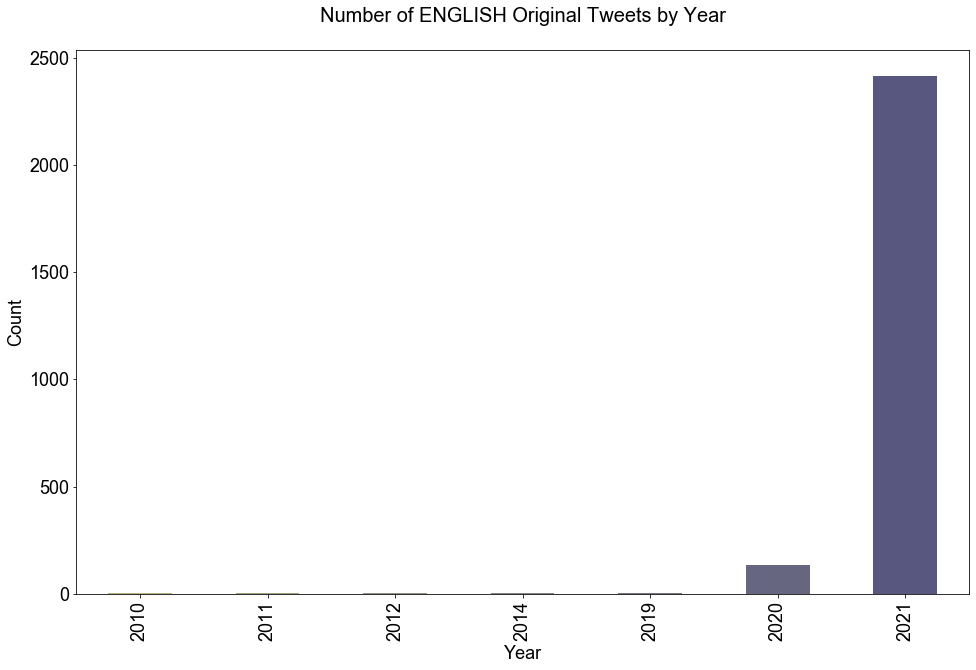

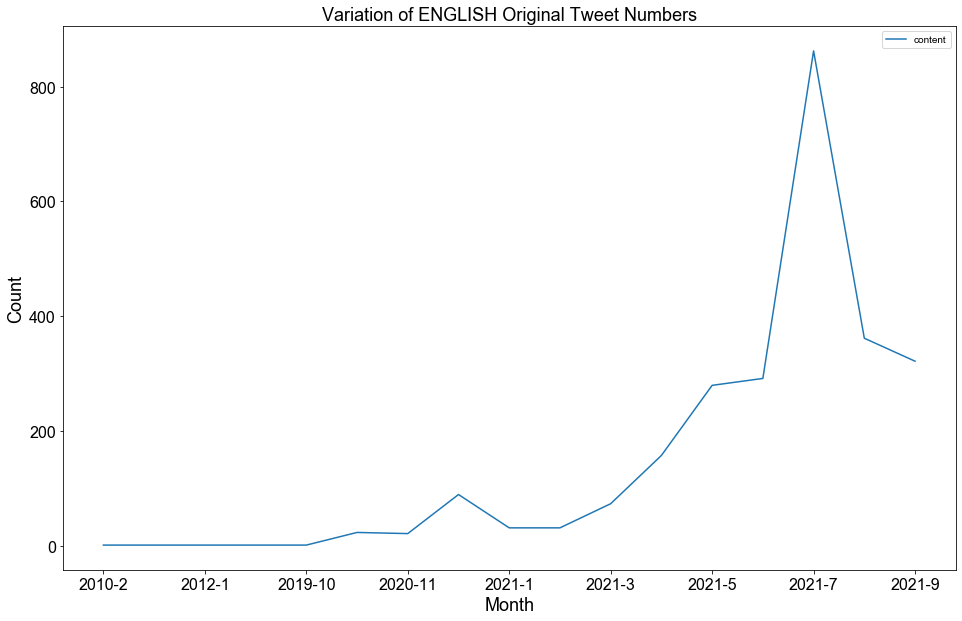

In [593]:
import matplotlib.pyplot as plt
# Number of tweets by year
colors = []
for i in range(2020-2010+1):
    x = 0.7-0.06*i
    c = (x,x,0.5)
    colors.append(c)

bar = eng["publish_time"].apply(lambda x: x.year).value_counts(dropna=True).sort_index().plot.bar(figsize = (16,10), color = colors)
plt.title("Number of ENGLISH Original Tweets by Year\n", fontsize=20)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Count", fontsize=18)
bar.tick_params(labelsize=14)
bar.tick_params(labelsize=18)
plt.show()

# Number of tweets (more details)
eng["year_month"] = eng["publish_time"].apply(lambda x: str(x.year)+"-"+str(x.month))
# eng["year_month"] = pd.to_datetime(eng["year_month"])
year_month = pd.pivot_table(eng, values = "content", index = "year_month", aggfunc = "count")

bar = year_month.plot(figsize = (16,10))
plt.title("Variation of ENGLISH Original Tweet Numbers", fontsize=18)
bar.tick_params(labelsize=16)

plt.xlabel("Month", fontsize=18)
plt.ylabel("Count", fontsize=18)
bar.get_yaxis().set_visible(True)
plt.show()

In [594]:
#eng["vader_comp"]=eng["vader_comp"].apply(lambda x: x/2 if x>0 else(-x/2 if x<0 else x))

In [595]:
#eng.to_csv('/Users/patricia/Downloads/english_original.csv')

### 基于原帖内容的情感打分，随时间维度变化

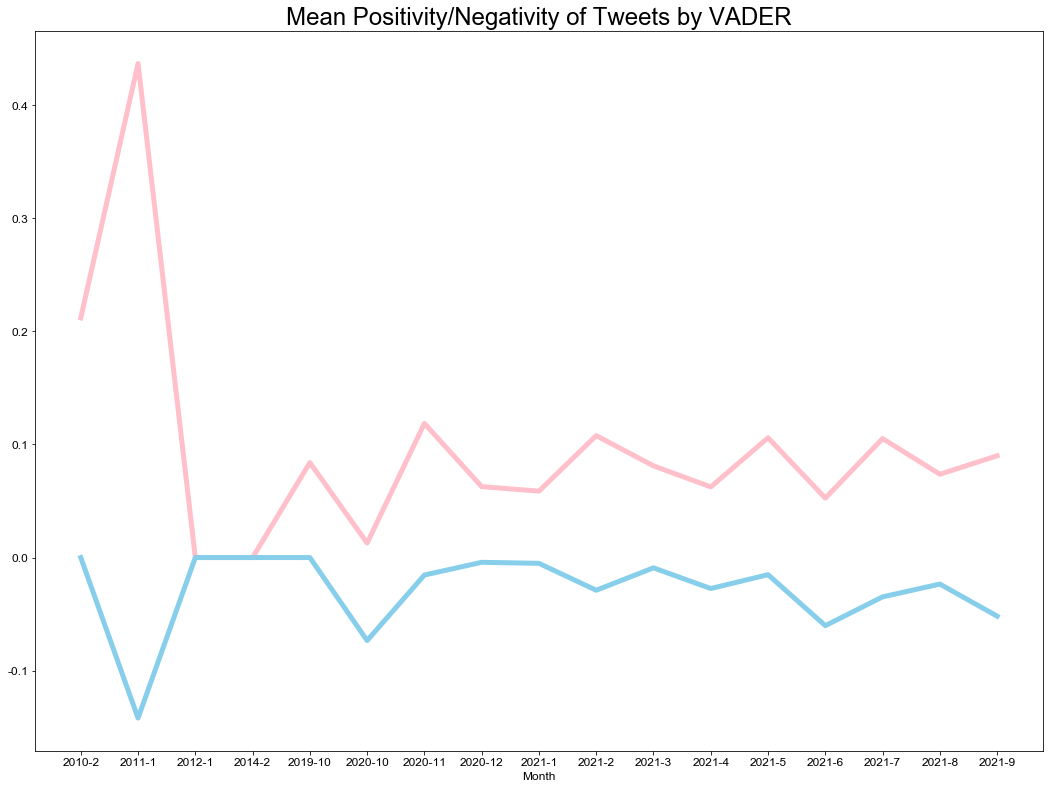

In [596]:
fig = plt.figure(figsize = (14,10))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Mean Positivity/Negativity of Tweets by VADER", fontsize=24)
ax.tick_params(labelsize=14)

# Positivity plot
year_month = pd.pivot_table(eng, values = "vader_pos", index = "year_month", aggfunc = "mean")
ax.plot(year_month, lw = 5,color = "Pink")

# Negativity plot
year_month = pd.pivot_table(eng, values = "vader_neg", index = "year_month", aggfunc = "mean").apply(lambda x: -x)
ax.plot(year_month, lw = 5, color = "Skyblue")
plt.xlabel("Month", fontsize=12)

# plot
#year_month = pd.pivot_table(eng, values = "vader_comp", index = "year_month", aggfunc = "sum")
#ax.plot(year_month, lw = 5,color = "Purple")


ax.tick_params(labelsize=12)
plt.show()

### 基于点赞评论转发数 展示原帖总体关注度

In [597]:
eng["cnt_agree"]=eng["cnt_agree"].apply(lambda x: int(x))
eng["cnt_comment"]=eng["cnt_comment"].apply(lambda x: int(x))
eng["cnt_retweet"]=eng["cnt_retweet"].apply(lambda x: int(x))

In [598]:
a=eng.groupby(["year_month"]).sum()["cnt_agree"]
c=eng.groupby(["year_month"]).sum()["cnt_comment"]
r=eng.groupby(["year_month"]).sum()["cnt_retweet"]
print("max number "+str(max(a))+" of agrees appears in ",pd.DataFrame(a).index[list(a).index(max(a))])
print("max number "+str(max(c))+" of comments appears in ",pd.DataFrame(c).index[list(c).index(max(c))])
print("max number "+str(max(r))+" of retweets appears in ",pd.DataFrame(r).index[list(r).index(max(r))])

max number 5992 of agrees appears in  2021-7
max number 586 of comments appears in  2021-7
max number 1900 of retweets appears in  2021-7


In [599]:
agrees = pd.pivot_table(eng, values = "cnt_agree", index = "year_month", aggfunc = "sum")
comments = pd.pivot_table(eng, values = "cnt_comment", index = "year_month", aggfunc = "sum")
retweets = pd.pivot_table(eng, values = "cnt_retweet", index = "year_month", aggfunc = "sum")

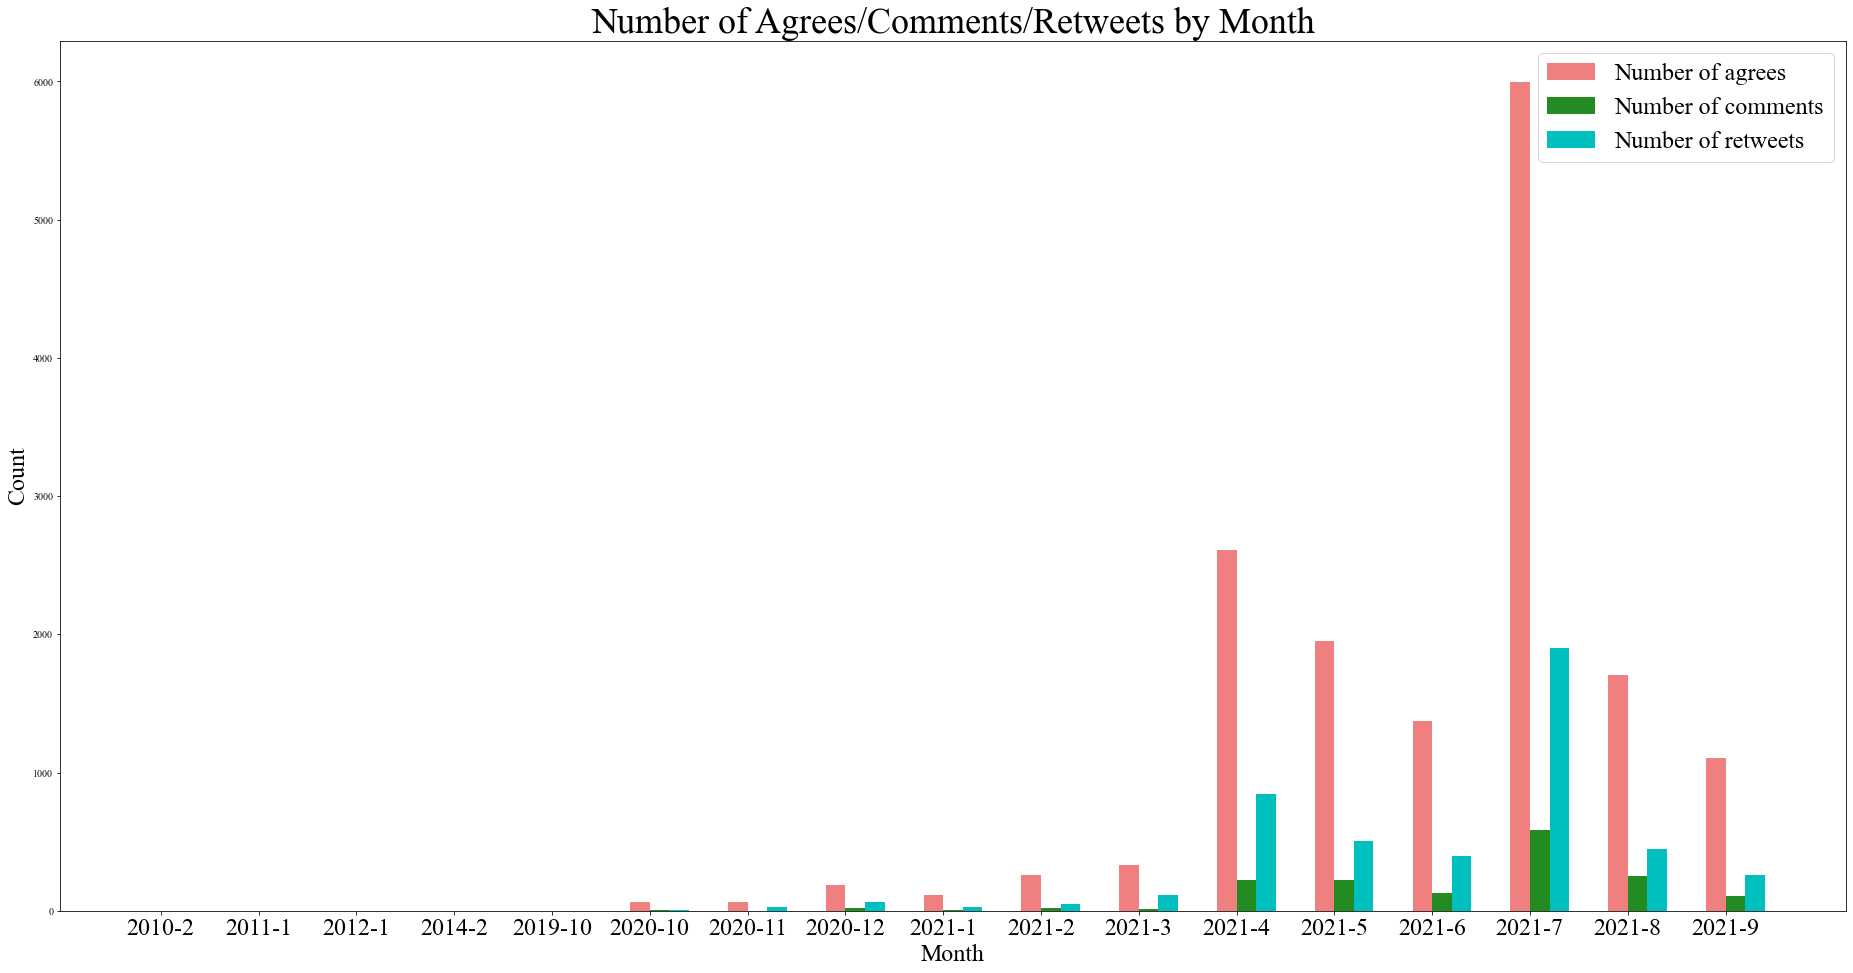

In [600]:
import numpy as np
import seaborn as sns
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.sans-serif'] = 'Times New Roman'

x1=np.arange(len(agrees)) #通常将x轴上的数字数字化处理
x2=[i+0.2 for i in x1] #设置间隔，因为是两个产品，所以第二个产品应该在第一个条形图往右移动一格
x3=[i+0.2 for i in x2]
w=0.2


fig,ax=plt.subplots(figsize=(32,16))
ax.bar(x1,np.array(agrees.values.ravel()),width=w,color="lightcoral",label="Number of agrees")
ax.bar(x2,np.array(comments.values.ravel()),width=w,color="forestgreen",label="Number of comments")
ax.bar(x3,np.array(retweets.values.ravel()),width=w,color="c",label="Number of retweets")

ax.set_title("Number of Agrees/Comments/Retweets by Month", fontsize=36)
ax.get_yaxis().set_visible(True)
plt.xticks(x1+0.2/2,labels=agrees.index,fontsize=24)
plt.xlabel("Month",fontsize=24)
plt.ylabel("Count",fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.show()

可以观察到，总体关注度集中在2021-07，收到的点赞、评论、转发数最多。
但考虑没有考虑到原帖数量，本身2021年收集到的帖文数量就最多

接下来考虑到每月发布条数，按比例对比：

In [601]:
count_month=eng["year_month"].value_counts(dropna=True).sort_index()
count_month=pd.DataFrame(count_month).rename(columns={'year_month':"Count"})
count_month

Count
2010-2       2
2011-1       2
2012-1       2
2014-2       2
2019-10      2
2020-10     24
2020-11     22
2020-12     90
2021-1      32
2021-2      32
2021-3      74
2021-4     158
2021-5     280
2021-6     292
2021-7     862
2021-8     362
2021-9     322

In [602]:
agree_rela=[]
for i in count_month.index:
    #print(i)
    #print(agrees[agrees.index==str(i)]["cnt_agree"][0])
    #print(count_month[count_month.index==str(i)]["Count"].values[0])
    relative=round((agrees[agrees.index==str(i)]["cnt_agree"][0])/(count_month[count_month.index==str(i)]["Count"].values[0]),2)
    agree_rela.append(relative)

In [603]:
agree_rela=pd.DataFrame(agree_rela,columns=["agree_rela"],index=count_month.index)
agrees.insert(1,"agree_rela",agree_rela)
agrees

cnt_agree  agree_rela
year_month                       
2010-2              0        0.00
2011-1              0        0.00
2012-1              0        0.00
2014-2              0        0.00
2019-10             0        0.00
2020-10            66        2.75
2020-11            64        2.91
2020-12           184        2.04
2021-1            112        3.50
2021-2            262        8.19
2021-3            328        4.43
2021-4           2612       16.53
2021-5           1952        6.97
2021-6           1376        4.71
2021-7           5992        6.95
2021-8           1708        4.72
2021-9           1102        3.42

In [604]:
comment_rela=[]
for i in count_month.index:
    #print(i)
    #print(agrees[agrees.index==str(i)]["cnt_agree"][0])
    #print(count_month[count_month.index==str(i)]["Count"].values[0])
    relative=round((comments[comments.index==str(i)]["cnt_comment"][0])/(count_month[count_month.index==str(i)]["Count"].values[0]),2)
    comment_rela.append(relative)
    
comment_rela=pd.DataFrame(comment_rela,columns=["comment_rela"],index=count_month.index)
comments.insert(1,"comment_rela",comment_rela)
comments

cnt_comment  comment_rela
year_month                           
2010-2                0          0.00
2011-1                0          0.00
2012-1                0          0.00
2014-2                0          0.00
2019-10               2          1.00
2020-10               8          0.33
2020-11               2          0.09
2020-12              18          0.20
2021-1                6          0.19
2021-2               22          0.69
2021-3               16          0.22
2021-4              220          1.39
2021-5              226          0.81
2021-6              130          0.45
2021-7              586          0.68
2021-8              250          0.69
2021-9              110          0.34

In [605]:
retweet_rela=[]
for i in count_month.index:
    #print(i)
    #print(agrees[agrees.index==str(i)]["cnt_agree"][0])
    #print(count_month[count_month.index==str(i)]["Count"].values[0])
    relative=round((retweets[retweets.index==str(i)]["cnt_retweet"][0])/(count_month[count_month.index==str(i)]["Count"].values[0]),2)
    retweet_rela.append(relative)
    
retweet_rela=pd.DataFrame(retweet_rela,columns=["retweet_rela"],index=count_month.index)
retweets.insert(1,"retweet_rela",retweet_rela)
retweets

cnt_retweet  retweet_rela
year_month                           
2010-2                0          0.00
2011-1                0          0.00
2012-1                0          0.00
2014-2                0          0.00
2019-10               0          0.00
2020-10               6          0.25
2020-11              26          1.18
2020-12              66          0.73
2021-1               28          0.88
2021-2               52          1.62
2021-3              112          1.51
2021-4              844          5.34
2021-5              502          1.79
2021-6              394          1.35
2021-7             1900          2.20
2021-8              446          1.23
2021-9              258          0.80

In [606]:
pd.concat([agrees,comments,retweets],axis=1).sort_values('year_month').to_csv('/Users/patricia/Downloads/english_original_acr.csv')

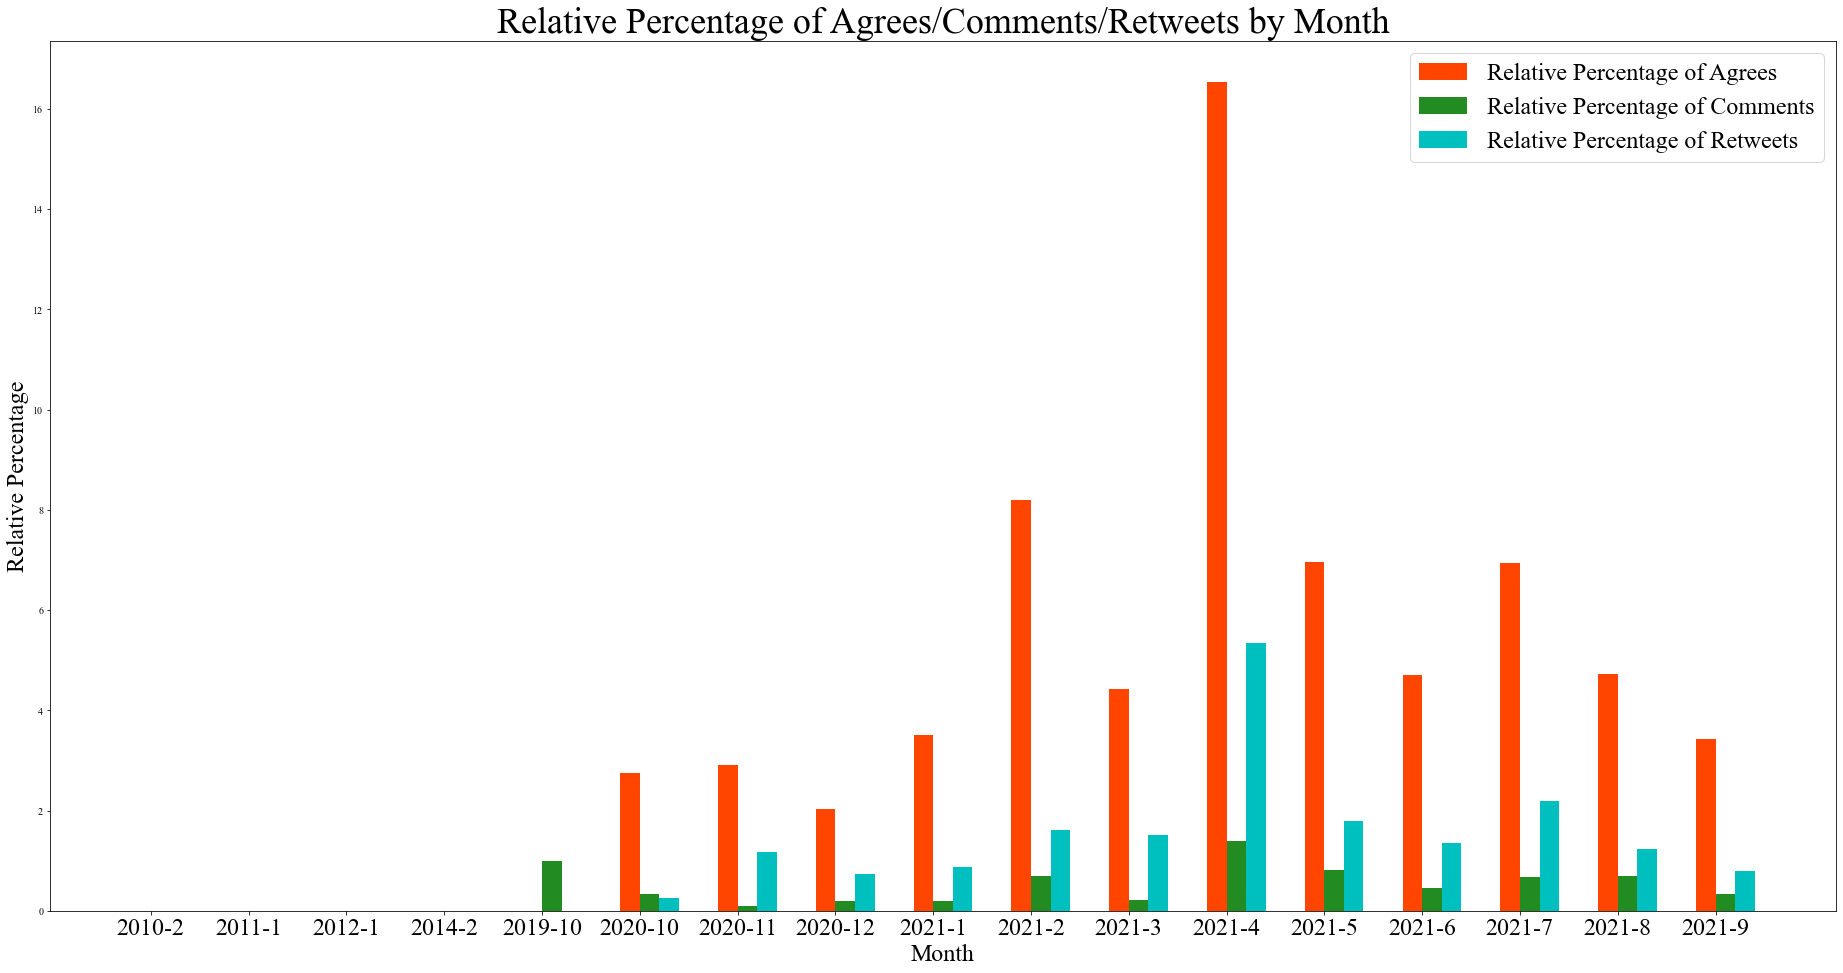

In [607]:
x1=np.arange(len(agrees)) #通常将x轴上的数字数字化处理
x2=[i+0.2 for i in x1] #设置间隔，第二个条形图在第一个条形图往右移动一格
x3=[i+0.2 for i in x2]
w=0.2


fig,ax=plt.subplots(figsize=(32,16))
ax.bar(x1,np.array(agrees["agree_rela"]),width=w,color="orangered",label="Relative Percentage of Agrees")
ax.bar(x2,np.array(comments["comment_rela"]),width=w,color="forestgreen",label="Relative Percentage of Comments")
ax.bar(x3,np.array(retweets["retweet_rela"]),width=w,color="c",label="Relative Percentage of Retweets")

ax.set_title("Relative Percentage of Agrees/Comments/Retweets by Month", fontsize=36)
ax.get_yaxis().set_visible(True)
plt.xticks(x1+0.2/2,labels=agrees.index,fontsize=24)
plt.xlabel("Month",fontsize=24)
plt.ylabel("Relative Percentage",fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.show()

根据原帖点赞、评论、转发数的相对比例，可以观察到关注度集中在2021年4月。

#### 原帖的用户帖文比例

In [608]:
cnt=eng.groupby(["year_month","topic_guid"])["topic_guid"].count()
usr=eng.groupby(["year_month","userid"])["userid"].count()
cnt_month=cnt.groupby(["year_month"]).count()
usr_month=usr.groupby(["year_month"]).count()
cnt_to_usr=cnt_month/usr_month
cnt_to_usr

year_month
2010-2     1.000000
2011-1     1.000000
2012-1     1.000000
2014-2     1.000000
2019-10    1.000000
2020-10    1.333333
2020-11    1.100000
2020-12    1.097561
2021-1     1.000000
2021-2     1.000000
2021-3     1.321429
2021-4     1.179104
2021-5     1.166667
2021-6     1.258621
2021-7     1.322086
2021-8     1.292857
2021-9     1.694737
dtype: float64

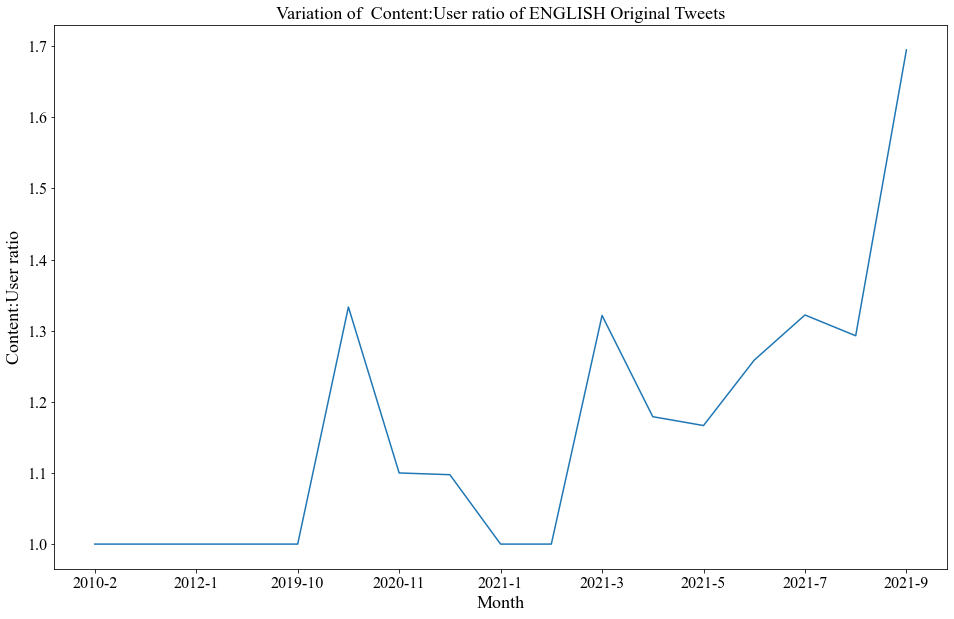

In [609]:
bar = cnt_to_usr.plot(figsize = (16,10))
plt.title("Variation of  Content:User ratio of ENGLISH Original Tweets", fontsize=18)
bar.tick_params(labelsize=16)

plt.xlabel("Month", fontsize=18)
plt.ylabel("Content:User ratio", fontsize=18)
bar.get_yaxis().set_visible(True)
plt.show()

In [610]:
data_original_eng=eng[["cnt_agree", "cnt_comment", "cnt_retweet","comp_score"]]
original_eng=eng[["content","cnt_agree", "cnt_comment", "cnt_retweet","comp_score"]]

In [611]:
english_original=pd.merge(eng,original_eng_senti, on="year_month",suffixes=("_x","_monthsum"))
english_original.to_csv('/Users/patricia/Downloads/english_original.csv')
english_original

userid                                            content  \
0      Crypto_Freakie  shanghai man economist says salvador road deat...   
1       webnowcompany  the feature comes months after smallscale test...   
2          btcnewsapp  shanghai man economist says salvador road deat...   
3     Beegamesnetwork  shanghai man economist says salvador road deat...   
4     BTCTechGroupLL1  shanghai man economist says salvador road deat...   
...               ...                                                ...   
2555         sporeMOH  health minister and all moh wishes everyone fr...   
2556      andrewangsg  ecny here one day will have reunion dinner usi...   
2557      andrewangsg  ecny here one day will have reunion dinner usi...   
2558         BitTradr  here bet the next months china will announce d...   
2559         BitTradr  here bet the next months china will announce d...   

     publish_time page_action_type               relevant_topic_guid  \
0      2021-06-18               07  4781a1bcc6fe3c71f1237ce50cc29e72   
1      2021-06-18               07  0455338c1be95db57d8e87d52e202df8   
2      2021-06-18               07  ce757682e7b303e9b295167da69b9fc7   
3      2021-06-18               07  5548bc7ce912561656d910328880d913   
4      2021-06-18               07  de72cde39681fff3b729e11361a08133   
...           ...              ...                               ...   
2555   2010-02-12               07  099cf1382d59036a1aa4b72d6f698bc0   
2556   2014-02-01               07  2f61e194ac5c57e13e168c3f8454c740   
2557   2014-02-01               07  2f61e194ac5c57e13e168c3f8454c740   
2558   2019-10-19               07  7dc61b19f5fd51174ae28a0db524d404   
2559   2019-10-19               07  7dc61b19f5fd51174ae28a0db524d404   

                            topic_guid  cnt_agree  cnt_comment  cnt_retweet  \
0     4781a1bcc6fe3c71f1237ce50cc29e72          0            0            0   
1     0455338c1be95db57d8e87d52e202df8          1            0            1   
2     ce757682e7b303e9b295167da69b9fc7          0            0            0   
3     5548bc7ce912561656d910328880d913          0            0            0   
4     de72cde39681fff3b729e11361a08133          0            0            0   
...                                ...        ...          ...          ...   
2555  099cf1382d59036a1aa4b72d6f698bc0          0            0            0   
2556  2f61e194ac5c57e13e168c3f8454c740          0            0            0   
2557  2f61e194ac5c57e13e168c3f8454c740          0            0            0   
2558  7dc61b19f5fd51174ae28a0db524d404          0            1            0   
2559  7dc61b19f5fd51174ae28a0db524d404          0            1            0   

     dayofweek language  vader_neg  vader_neu  vader_pos  vader_comp_x  \
0       Friday       en      0.140      0.860      0.000       -0.5994   
1       Friday       en      0.000      1.000      0.000        0.0000   
2       Friday       en      0.218      0.782      0.000       -0.5994   
3       Friday       en      0.109      0.891      0.000       -0.5994   
4       Friday       en      0.115      0.885      0.000       -0.5994   
...        ...      ...        ...        ...        ...           ...   
2555    Friday       en      0.000      0.788      0.212        0.5106   
2556  Saturday       en      0.000      1.000      0.000        0.0000   
2557  Saturday       en      0.000      1.000      0.000        0.0000   
2558  Saturday       en      0.000      0.916      0.084        0.5251   
2559  Saturday       en      0.000      0.916      0.084        0.5251   

     comp_score year_month  vader_comp_monthsum  
0           neg     2021-6              -6.3786  
1           neu     2021-6              -6.3786  
2           neg     2021-6              -6.3786  
3           neg     2021-6              -6.3786  
4           neg     2021-6              -6.3786  
...         ...        ...                  ...  
2555        pos     2010-2               1.0212  

### Twitter中文原帖
点赞、评论、转发数反映正负情感关注度


In [612]:
import re
import string
import emoji

def clean_text(text):
    '''Make text lowercase, 
    remove text in square brackets,
    remove links,
    remove punctuation.'''
    text = str(text)
    text = re.sub('\(.*?\)', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\【.*?\】', '', text)
    text = re.sub('\《.*?\》', '', text)
    text = re.sub(r"#",'', text)
    text = re.sub(r"•",'', text)
    text = re.sub(r"（",'', text)
    text = re.sub(r"）",'', text)
    text = re.sub(r"『",'', text)
    text = re.sub(r"』",'', text)
    text = re.sub(r"“",'', text)
    text = re.sub(r"”",'', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\'','', text)
    #text = re.sub(r'\W+', '', text)
    #text = re.sub('[^%&,;=?$\x22]', '', text)
    text = re.sub("[a-zA-Z0-9]", "", text)
    text = re.sub(r'\b\w{1,2}\b', "", text) # removes remaining one-letter words and two letters words 
    text = re.sub(r"[ \t]{2,}", "", text)
    return text 


emoji_pattern = re.compile("["
    u'[\uD800-\uDBFF][\uDC00-\uDFFF]'
    u"(\ud83d[\ude00-\ude4f])|"  # emoticons
    u"(\ud83c[\udf00-\uffff])|"  # symbols & pictographs (1 of 2)
    u"(\ud83d[\u0000-\uddff])|"  # symbols & pictographs (2 of 2)
    u"(\ud83d[\ude80-\udeff])|"  # transport & map symbols
    u"(\ud83c[\udde0-\uddff])"  # flags (iOS)
    "]+", flags=re.UNICODE)

def remove_emoji(text):
    return emoji_pattern.sub(r'', text)

def demojized(text):
    text = emoji.demojize(text)
    return text

original_chi["content"] = original_chi["content"].apply(lambda x : demojized(x))
original_chi["content"] = original_chi["content"].apply(lambda x : remove_emoji(x))
original_chi["content"] = original_chi["content"].apply(lambda x : clean_text(x))
original_chi["content"]

27       偶然去银行办业务，被强推了数字钱包，称每个卡都要升级数字钱包，否则以后不能用，以后发工资也要...
28       比特币基金会主席 布罗克·皮尔斯：我认为中共国对数字货币的打压以推行数字人民币的这一举措让美...
29       央行前行长周小川：支付系统现代化是隔一段时间迈一个台阶要有比较大的台阶，大家才有足够的动力去...
30                                   凯尔巴斯：。它就是一个现代数字特洛伊木马。
32       周小川：不要过多将数字人民币与国际化联系周小川数字人民币国际化人民币数字货币储备货币主导地位...
                               ...                        
21648    从上市公司半年报来看，多家公司正抢抓数字人民币业务，将数字人民币看作是下一个业务增长点。据记...
21649    区块链快讯星期一 、紫光国微首推数字人民币解决方案，已在多个城市试点运行 、支付宝上线爱心捐...
21650       数字人民币如何使用？记者带你服贸会抢先体验！  数字人民币如何使用？记者带你服贸会抢先体验！
21651     服贸会奇遇记：数字人民币人气旺 多应用场景亮相  服贸会奇遇记：数字人民币人气旺 多应用场景亮相
21652    、人工智能当客服、普惠小微贷款能自助……当科技牵手金融，能够碰撞出怎样的火花？一起感受金融领...
Name: content, Length: 8175, dtype: object

In [613]:
original_chi['len'] = original_chi['content'].apply(lambda x:len(x))
original_chi=original_chi[original_chi['len']>1]

In [614]:
text=original_chi.copy()

# 加载常用停用词
stopwords1 = [line.rstrip() for line in open('/Users/patricia/Downloads/stopwords/中文停用词库.txt', 'r', encoding='utf-8')]
stopwords2 = [line.rstrip() for line in open('/Users/patricia/Downloads/stopwords/哈工大停用词表.txt', 'r', encoding='utf-8')]
stopwords3 = [line.rstrip() for line in open('/Users/patricia/Downloads/stopwords/四川大学机器智能实验室停用词库.txt', 'r', encoding='utf-8')]
stopwords4 = [line.rstrip() for line in open('/Users/patricia/Downloads/stopwords/stopwords.txt', 'r', encoding='utf-8')]
stopwords = stopwords1 + stopwords2 + stopwords3 + stopwords4

In [615]:
from snownlp import SnowNLP
def compute_snownlp_scores(df, label):
    df["snownlp_scores"] = df[label].apply(lambda x: SnowNLP(x).sentiments)
    return df
sentiment = compute_snownlp_scores(text, "content")

In [616]:
def compute_snownlp_senti(df,refer):
    df["snownlp_senti"] = df[refer].apply(lambda x: "pos" if x>0.8 else ('neg' if x<0.5 else 'neu'))
    return df
sentiment = compute_snownlp_senti(sentiment, "snownlp_scores")
chi=sentiment.copy()
sentiment[:1]

userid                                            content  \
27  liangshaohua  偶然去银行办业务，被强推了数字钱包，称每个卡都要升级数字钱包，否则以后不能用，以后发工资也要...   

   publish_time page_action_type               relevant_topic_guid  \
27   2021-05-22               07  8b0e006b3d1e1b12dacc442c9944a203   

                          topic_guid cnt_agree cnt_comment cnt_retweet  \
27  8b0e006b3d1e1b12dacc442c9944a203        14           0           0   

   dayofweek language  len  snownlp_scores snownlp_senti  
27  Saturday       zh  135        0.001897           neg

In [617]:
percent_pos = round(100*sentiment[sentiment['snownlp_senti']=="pos"].shape[0]/sentiment['snownlp_senti'].shape[0], 2)
percent_neu = round(100*sentiment[sentiment['snownlp_senti']=="neu"].shape[0]/sentiment['snownlp_senti'].shape[0], 2)
percent_neg = round(100*sentiment[sentiment['snownlp_senti']=="neg"].shape[0]/sentiment['snownlp_senti'].shape[0], 2)

print(str(percent_pos) + "% 的中文原帖被SnowNLP分类为正面情感")
print(str(percent_neg) + "% 的中文原帖被SnowNLP分类为负面情感")

69.94% 的中文原帖被SnowNLP分类为正面情感
17.93% 的中文原帖被SnowNLP分类为负面情感


In [618]:
chi.publish_time.max(),chi.publish_time.min()

(Timestamp('2021-09-28 00:00:00'), Timestamp('2019-09-12 00:00:00'))

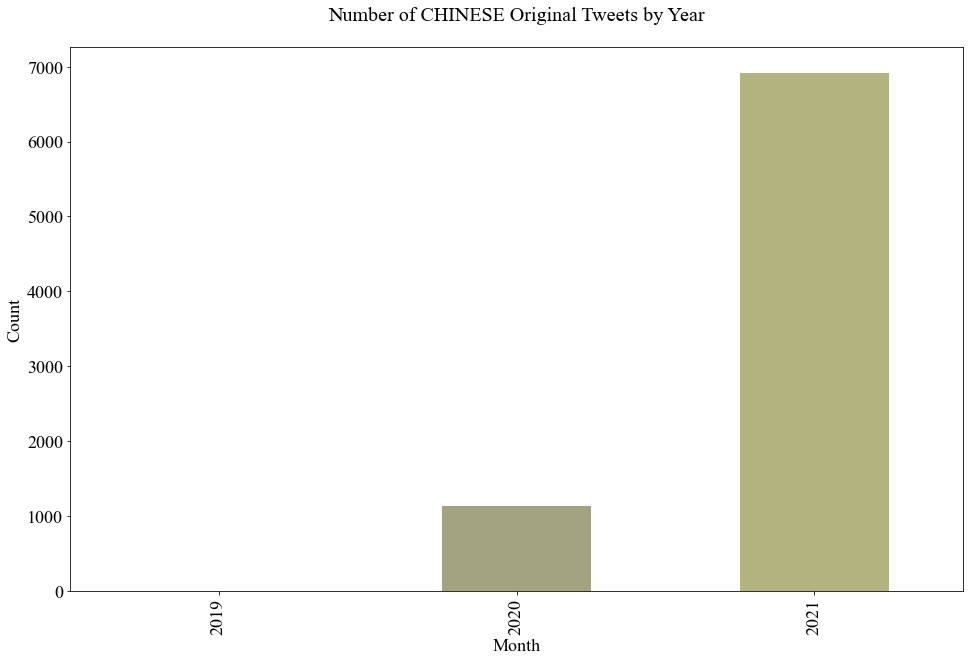

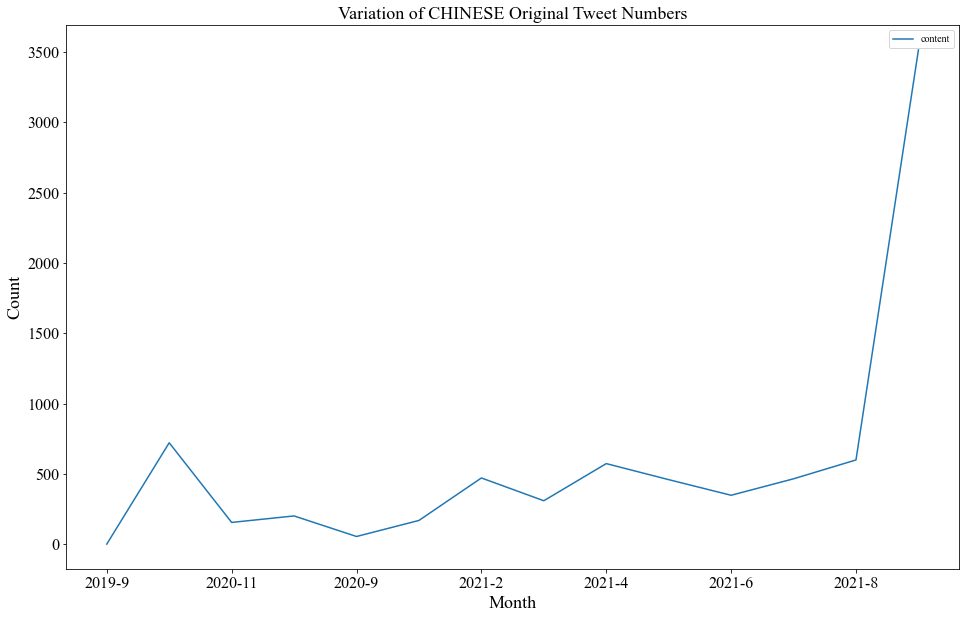

In [619]:
# Number of tweets by year
colors = []
for i in range(2020-2019+1):
    x = 0.7-0.06*i
    c = (x,x,0.5)
    colors.append(c)

bar = chi["publish_time"].apply(lambda x: x.year).value_counts(dropna=True).sort_index().plot.bar(figsize = (16,10), color = colors)
plt.title("Number of CHINESE Original Tweets by Year\n", fontsize=20)
plt.xlabel("Month",fontsize=18)
plt.ylabel("Count",fontsize=18)
bar.tick_params(labelsize=14)
bar.tick_params(labelsize=18)
plt.show()

# Number of tweets (more details)
chi["year_month"] = chi["publish_time"].apply(lambda x: str(x.year)+"-"+str(x.month))
# eng["year_month"] = pd.to_datetime(eng["year_month"])
year_month = pd.pivot_table(chi, values = "content", index = "year_month", aggfunc = "count")

bar = year_month.plot(figsize = (16,10))
plt.title("Variation of CHINESE Original Tweet Numbers", fontsize=18)
bar.tick_params(labelsize=16)
plt.xlabel("Month",fontsize=18)
plt.ylabel("Count",fontsize=18)

bar.get_yaxis().set_visible(True)
plt.show()

### 基于原帖内容的情感打分，随时间维度变化

In [620]:
chi

userid                                            content  \
27        liangshaohua  偶然去银行办业务，被强推了数字钱包，称每个卡都要升级数字钱包，否则以后不能用，以后发工资也要...   
28          mc64122225  比特币基金会主席 布罗克·皮尔斯：我认为中共国对数字货币的打压以推行数字人民币的这一举措让美...   
29          myfxtrader  央行前行长周小川：支付系统现代化是隔一段时间迈一个台阶要有比较大的台阶，大家才有足够的动力去...   
30     MilesSm41692872                              凯尔巴斯：。它就是一个现代数字特洛伊木马。   
32     K7kV30bYi00LDCC  周小川：不要过多将数字人民币与国际化联系周小川数字人民币国际化人民币数字货币储备货币主导地位...   
...                ...                                                ...   
21648       1801487174  从上市公司半年报来看，多家公司正抢抓数字人民币业务，将数字人民币看作是下一个业务增长点。据记...   
21649       2405635012  区块链快讯星期一 、紫光国微首推数字人民币解决方案，已在多个城市试点运行 、支付宝上线爱心捐...   
21650       5281187541     数字人民币如何使用？记者带你服贸会抢先体验！  数字人民币如何使用？记者带你服贸会抢先体验！   
21651       5281187541   服贸会奇遇记：数字人民币人气旺 多应用场景亮相  服贸会奇遇记：数字人民币人气旺 多应用场景亮相   
21652       5401012250  、人工智能当客服、普惠小微贷款能自助……当科技牵手金融，能够碰撞出怎样的火花？一起感受金融领...   

      publish_time page_action_type               relevant_topic_guid  \
27      2021-05-22               07  8b0e006b3d1e1b12dacc442c9944a203   
28      2021-05-22               07  19dcdc789a15d964901b7261c2235406   
29      2021-05-22               07  1dab8b3b2484ca3cd1d75b2c92249104   
30      2021-05-22               07  ad8b7b7928e7a4473be56c390680eadf   
32      2021-05-22               07  f130a23599cb1df88eecffcec1c5a25c   
...            ...              ...                               ...   
21648   2021-09-06               07  0ad757708ad29bf3432208bb201f604d   
21649   2021-09-06               07  ccc5f59070d9ebf6cc5bfd335ad3ca3a   
21650   2021-09-05               07  a92d402c7562b6f80b9b7e14c99f0562   
21651   2021-09-05               07  a62047c3909845b874a416370e38598b   
21652   2021-09-05               07  e2f2cf2be82cb08d842db0b3c3aa8daa   

                             topic_guid cnt_agree cnt_comment cnt_retweet  \
27     8b0e006b3d1e1b12dacc442c9944a203        14           0           0   
28     19dcdc789a15d964901b7261c2235406         5           0           9   
29     1dab8b3b2484ca3cd1d75b2c92249104         1           2           0   
30     ad8b7b7928e7a4473be56c390680eadf         0           0           0   
32     f130a23599cb1df88eecffcec1c5a25c         0           0           0   
...                                 ...       ...         ...         ...   
21648  0ad757708ad29bf3432208bb201f604d        16           1          10   
21649  ccc5f59070d9ebf6cc5bfd335ad3ca3a        18          15          12   
21650  a92d402c7562b6f80b9b7e14c99f0562         2           1           0   
21651  a62047c3909845b874a416370e38598b         3           1           2   
21652  e2f2cf2be82cb08d842db0b3c3aa8daa         0           0           0   

      dayofweek language  len  snownlp_scores snownlp_senti year_month  
27     Saturday       zh  135        0.001897           neg     2021-5  
28     Saturday       zh   53        0.995100           pos     2021-5  
29     Saturday       zh  113        0.010158           neg     2021-5  
30     Saturday       zh   21        0.883457           pos     2021-5  
32     Saturday       zh   59        0.999999           pos     2021-5  
...         ...      ...  ...             ...           ...        ...  
21648    Monday       zh  128        0.999980           pos     2021-9  
21649    Monday       zh  139        1.000000           pos     2021-9  
21650    Sunday       zh   46        0.999955           pos     2021-9  
21651    Sunday       zh   48        0.999964           pos     2021-9  
21652    Sunday       zh   82        0.999999           pos     2021-9  

[8053 rows x 15 columns]

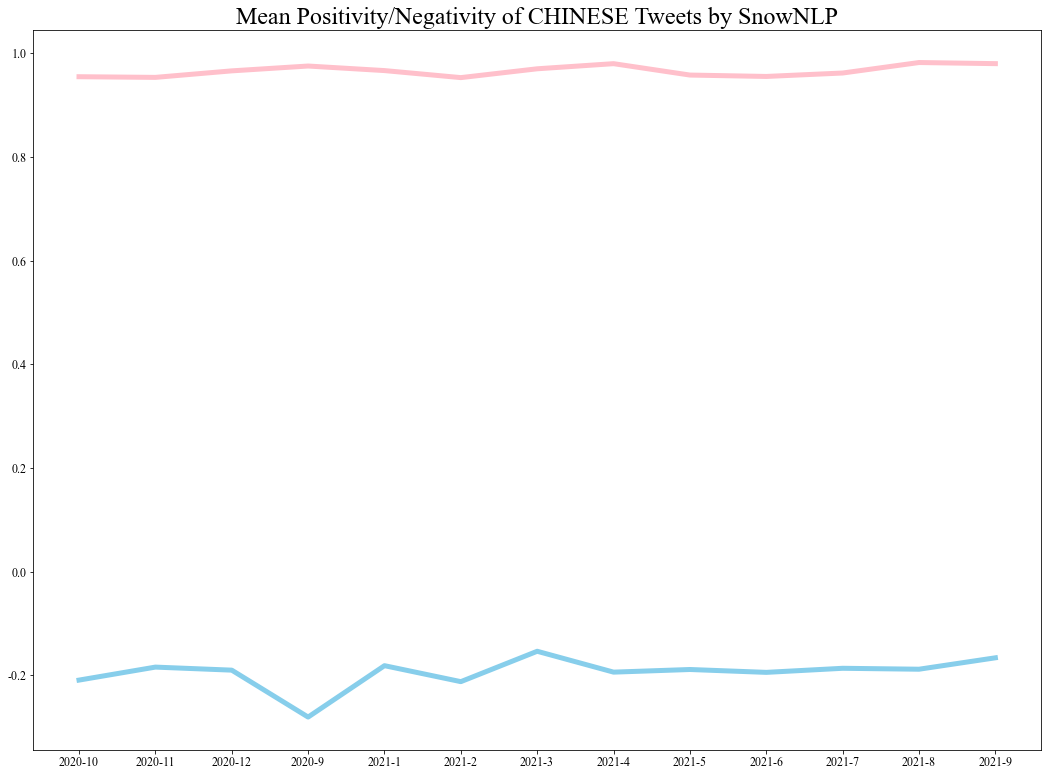

In [621]:
fig = plt.figure(figsize = (14,10))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Mean Positivity/Negativity of CHINESE Tweets by SnowNLP", fontsize=24)
ax.tick_params(labelsize=14)

chi_pos=chi[chi["snownlp_senti"]=="pos"]
# Positivity plot
year_month = pd.pivot_table(chi_pos, values = "snownlp_scores", index = "year_month", aggfunc = "mean")
ax.plot(year_month, lw = 5,color = "Pink")

chi_neg=chi[chi["snownlp_senti"]=="neg"]
# Negativity plot
year_month = pd.pivot_table(chi_neg, values = "snownlp_scores", index = "year_month", aggfunc = "mean").apply(lambda x: -x)
ax.plot(year_month, lw = 5, color = "Skyblue")

"""
year_month = pd.pivot_table(chi, values = "snownlp_scores", index = "year_month", aggfunc = "sum")
ax.plot(year_month, lw = 5,color = "Purple")
"""
ax.tick_params(labelsize=12)
plt.show()

In [622]:
chi["snownlp_scores"]=chi["snownlp_scores"].apply(lambda x: (x-0.5)*2 )

In [623]:
original_chi_senti=pd.pivot_table(chi, values = "snownlp_scores", index = "year_month", aggfunc = "sum")
chinese_original=pd.merge(chi,original_chi_senti, on="year_month",suffixes=("_x","_monthsum"))


### 基于点赞评论转发数 分析原帖总体关注度

In [624]:
chi["cnt_agree"]=chi["cnt_agree"].apply(lambda x: int(x))
chi["cnt_comment"]=chi["cnt_comment"].apply(lambda x: int(x))
chi["cnt_retweet"]=chi["cnt_retweet"].apply(lambda x: int(x))

In [625]:
a=chi.groupby(["year_month"]).sum()["cnt_agree"]
c=chi.groupby(["year_month"]).sum()["cnt_comment"]
r=chi.groupby(["year_month"]).sum()["cnt_retweet"]
print("max number "+str(max(a))+" of agrees appears in ",pd.DataFrame(a).index[list(a).index(max(a))])
print("max number "+str(max(c))+" of comments appears in ",pd.DataFrame(c).index[list(c).index(max(c))])
print("max number "+str(max(r))+" of retweets appears in ",pd.DataFrame(r).index[list(r).index(max(r))])

max number 20978 of agrees appears in  2021-9
max number 5718 of comments appears in  2021-9
max number 5096 of retweets appears in  2021-9


In [626]:
agrees = pd.pivot_table(chi, values = "cnt_agree", index = "year_month", aggfunc = "sum")
comments = pd.pivot_table(chi, values = "cnt_comment", index = "year_month", aggfunc = "sum")
retweets = pd.pivot_table(chi, values = "cnt_retweet", index = "year_month", aggfunc = "sum")

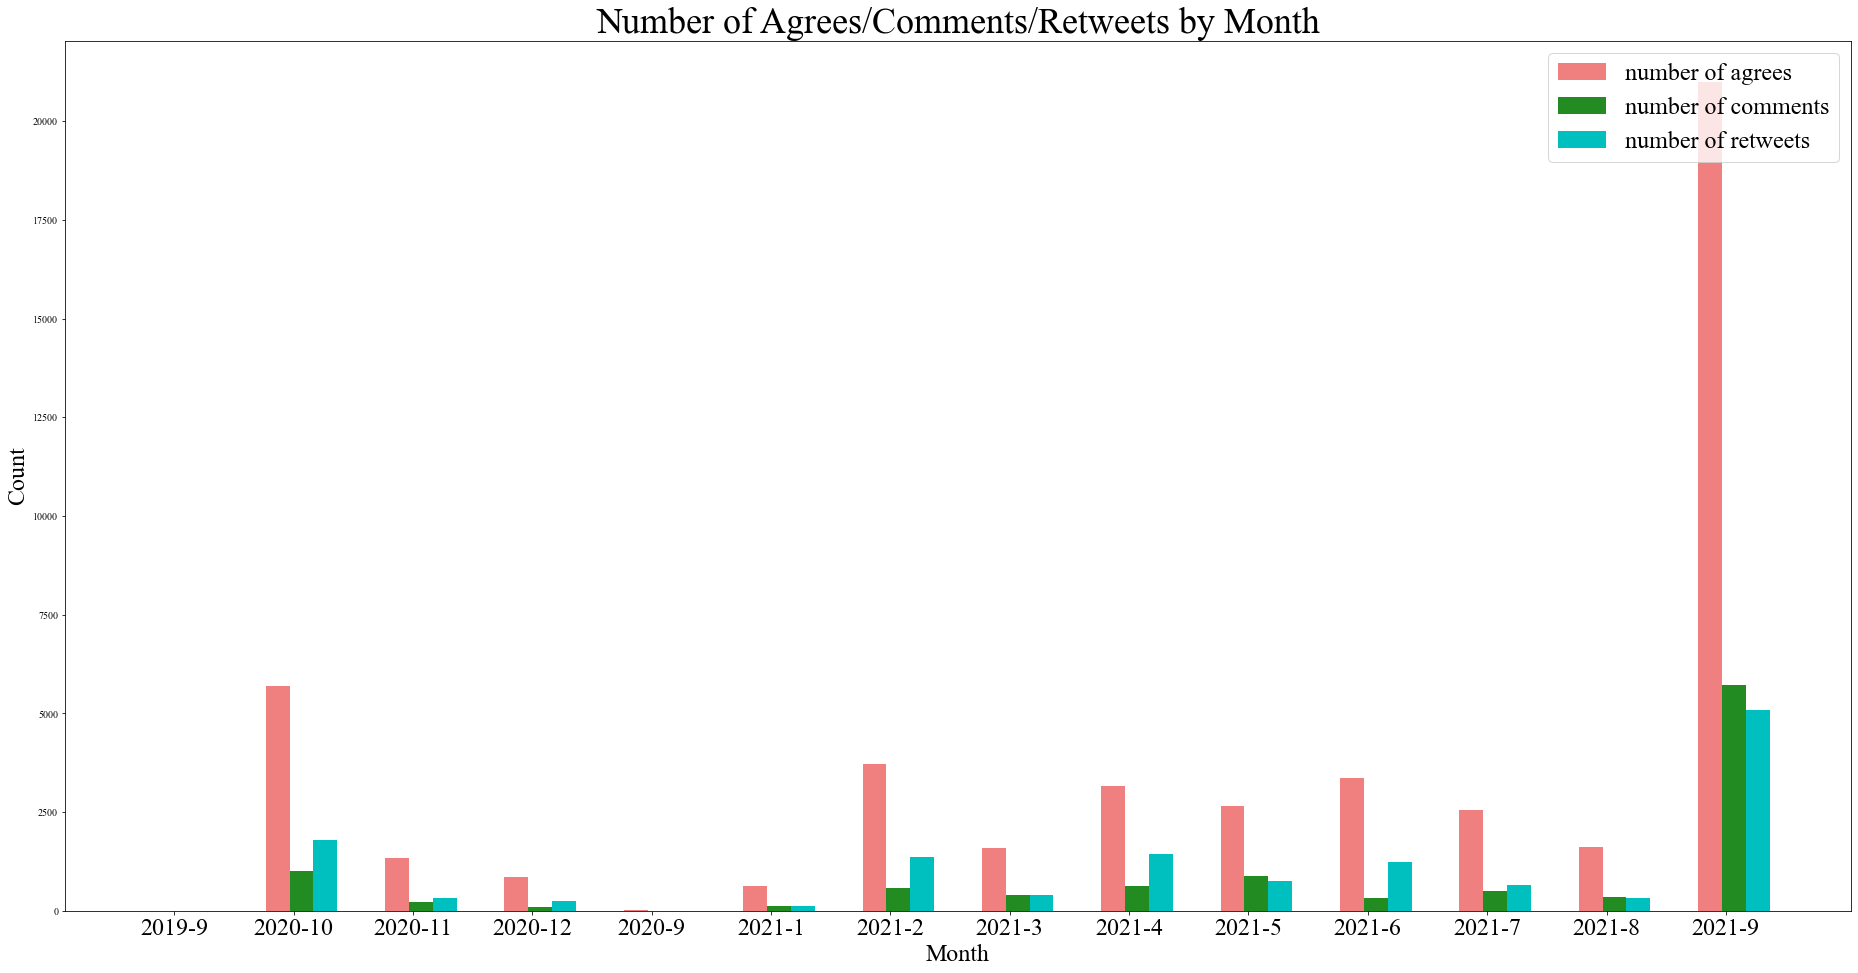

In [627]:
x1=np.arange(len(agrees)) #通常将x轴上的数字数字化处理
x2=[i+0.2 for i in x1] #设置间隔，第二个条形图在第一个的往右移动一格
x3=[i+0.2 for i in x2]
w=0.2


fig,ax=plt.subplots(figsize=(32,16))
ax.bar(x1,np.array(agrees.values.ravel()),width=w,color="lightcoral",label="number of agrees")
ax.bar(x2,np.array(comments.values.ravel()),width=w,color="forestgreen",label="number of comments")
ax.bar(x3,np.array(retweets.values.ravel()),width=w,color="c",label="number of retweets")

ax.set_title("Number of Agrees/Comments/Retweets by Month", fontsize=36)
ax.get_yaxis().set_visible(True)
plt.xticks(x1+0.4/3,labels=agrees.index,fontsize=24)
plt.xlabel("Month",fontsize=24)
plt.ylabel("Count",fontsize=24)

plt.legend(loc='upper right',fontsize=24)
plt.show()

In [628]:
count_month=chi["year_month"].value_counts(dropna=True).sort_index()
count_month=pd.DataFrame(count_month).rename(columns={'year_month':"Count"})

agree_rela=[]
for i in count_month.index:
    #print(i)
    #print(agrees[agrees.index==str(i)]["cnt_agree"][0])
    #print(count_month[count_month.index==str(i)]["Count"].values[0])
    relative=round((agrees[agrees.index==str(i)]["cnt_agree"][0])/(count_month[count_month.index==str(i)]["Count"].values[0]),2)
    agree_rela.append(relative)

agree_rela=pd.DataFrame(agree_rela,columns=["agree_rela"],index=count_month.index)
agrees.insert(1,"agree_rela",agree_rela)


comment_rela=[]
for i in count_month.index:
    #print(i)
    #print(agrees[agrees.index==str(i)]["cnt_agree"][0])
    #print(count_month[count_month.index==str(i)]["Count"].values[0])
    relative=round((comments[comments.index==str(i)]["cnt_comment"][0])/(count_month[count_month.index==str(i)]["Count"].values[0]),2)
    comment_rela.append(relative)
    
comment_rela=pd.DataFrame(comment_rela,columns=["comment_rela"],index=count_month.index)
comments.insert(1,"comment_rela",comment_rela)

retweet_rela=[]
for i in count_month.index:
    #print(i)
    #print(agrees[agrees.index==str(i)]["cnt_agree"][0])
    #print(count_month[count_month.index==str(i)]["Count"].values[0])
    relative=round((retweets[retweets.index==str(i)]["cnt_retweet"][0])/(count_month[count_month.index==str(i)]["Count"].values[0]),2)
    retweet_rela.append(relative)
    
retweet_rela=pd.DataFrame(retweet_rela,columns=["retweet_rela"],index=count_month.index)
retweets.insert(1,"retweet_rela",retweet_rela)

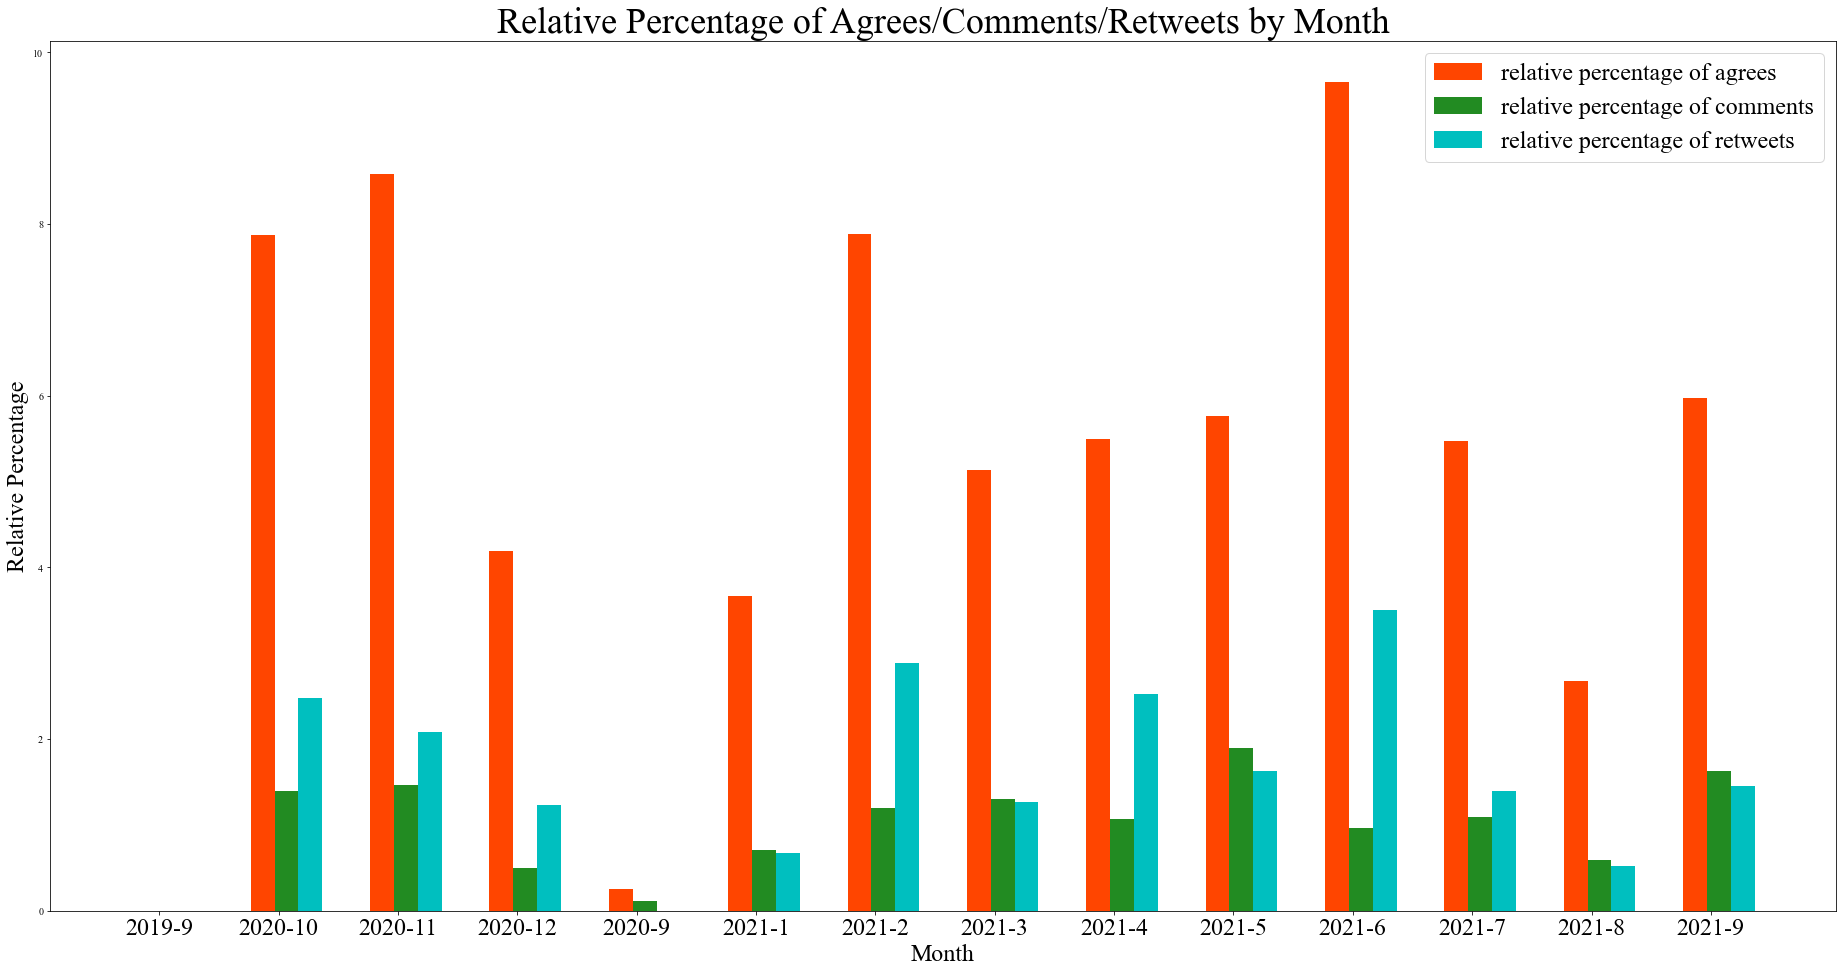

In [629]:
x1=np.arange(len(agrees)) #通常将x轴上的数字数字化处理
x2=[i+0.2 for i in x1] #设置间隔，第二个条形图在第一个条形图往右移动一格
x3=[i+0.2 for i in x2]
w=0.2


fig,ax=plt.subplots(figsize=(32,16))
ax.bar(x1,np.array(agrees["agree_rela"]),width=w,color="orangered",label="relative percentage of agrees")
ax.bar(x2,np.array(comments["comment_rela"]),width=w,color="forestgreen",label="relative percentage of comments")
ax.bar(x3,np.array(retweets["retweet_rela"]),width=w,color="c",label="relative percentage of retweets")

ax.set_title("Relative Percentage of Agrees/Comments/Retweets by Month", fontsize=36)
ax.get_yaxis().set_visible(True)
plt.xticks(x1+0.4/3,labels=agrees.index,fontsize=24)
plt.xlabel("Month",fontsize=24)
plt.ylabel("Relative Percentage",fontsize=24)

plt.legend(loc='upper right',fontsize=24)
plt.show()

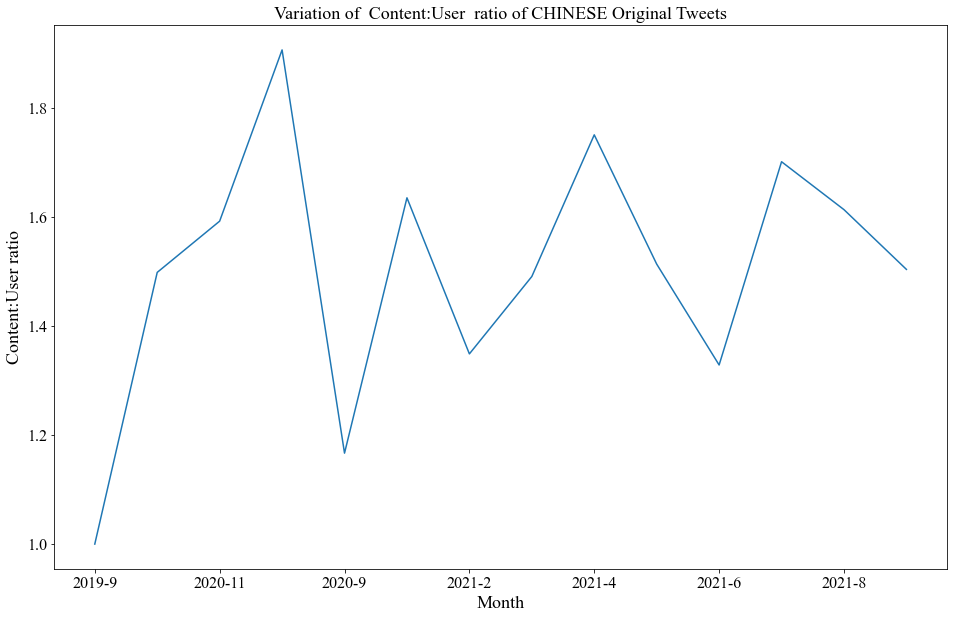

In [630]:
cnt=chi.groupby(["year_month","topic_guid"])["topic_guid"].count()
usr=chi.groupby(["year_month","userid"])["userid"].count()
cnt_month=cnt.groupby(["year_month"]).count().sort_index()
usr_month=usr.groupby(["year_month"]).count().sort_index()
cnt_to_usr=cnt_month/usr_month


bar = cnt_to_usr.plot(figsize = (16,10))
plt.title("Variation of  Content:User  ratio of CHINESE Original Tweets", fontsize=18)
bar.tick_params(labelsize=16)

plt.xlabel("Month", fontsize=18)
plt.ylabel("Content:User ratio", fontsize=18)
bar.get_yaxis().set_visible(True)
plt.show()

In [631]:
data_original_chi=chi[["cnt_agree", "cnt_comment", "cnt_retweet","snownlp_senti"]]
original_chi=chi[["content","cnt_agree", "cnt_comment", "cnt_retweet","snownlp_senti"]]

In [632]:
chinese_original=pd.merge(chi,original_chi_senti, on="year_month",suffixes=("_x","_monthsum"))
chinese_original.to_csv('/Users/patricia/Downloads/chinese_original.csv')
chinese_original

userid                                            content  \
0        liangshaohua  偶然去银行办业务，被强推了数字钱包，称每个卡都要升级数字钱包，否则以后不能用，以后发工资也要...   
1          mc64122225  比特币基金会主席 布罗克·皮尔斯：我认为中共国对数字货币的打压以推行数字人民币的这一举措让美...   
2          myfxtrader  央行前行长周小川：支付系统现代化是隔一段时间迈一个台阶要有比较大的台阶，大家才有足够的动力去...   
3     MilesSm41692872                              凯尔巴斯：。它就是一个现代数字特洛伊木马。   
4     K7kV30bYi00LDCC  周小川：不要过多将数字人民币与国际化联系周小川数字人民币国际化人民币数字货币储备货币主导地位...   
...               ...                                                ...   
8048            aozxw     央行数字人民币不计息中国多省拖欠教师工资澳洲新闻网人民币 堪培拉 曾庆红 澳大利亚澳洲进口    
8049     ChainNewscom  数字人民币局限于替代现金，在管理制度、运行规则等方面基本保持不变，不会对现有金融体系产生重大...   
8050            aozxw     央行数字人民币不计息中国多省拖欠教师工资澳洲新闻网人民币 堪培拉 曾庆红 澳大利亚澳洲进口    
8051          0xzxcom                                    这就是中国推出数字元的原因。    
8052          0xzxcom                                    这就是中国推出数字元的原因。    

     publish_time page_action_type               relevant_topic_guid  \
0      2021-05-22               07  8b0e006b3d1e1b12dacc442c9944a203   
1      2021-05-22               07  19dcdc789a15d964901b7261c2235406   
2      2021-05-22               07  1dab8b3b2484ca3cd1d75b2c92249104   
3      2021-05-22               07  ad8b7b7928e7a4473be56c390680eadf   
4      2021-05-22               07  f130a23599cb1df88eecffcec1c5a25c   
...           ...              ...                               ...   
8048   2020-09-17               07  bf32949b4aa10ad77bca7d2e27c8e156   
8049   2020-09-17               07  110eb043fead0b36669ed680a1e835f8   
8050   2020-09-17               07  bf32949b4aa10ad77bca7d2e27c8e156   
8051   2019-09-12               07  9aeb82731f80b1443afa5c9d274fb3eb   
8052   2019-09-12               07  9aeb82731f80b1443afa5c9d274fb3eb   

                            topic_guid  cnt_agree  cnt_comment  cnt_retweet  \
0     8b0e006b3d1e1b12dacc442c9944a203         14            0            0   
1     19dcdc789a15d964901b7261c2235406          5            0            9   
2     1dab8b3b2484ca3cd1d75b2c92249104          1            2            0   
3     ad8b7b7928e7a4473be56c390680eadf          0            0            0   
4     f130a23599cb1df88eecffcec1c5a25c          0            0            0   
...                                ...        ...          ...          ...   
8048  bf32949b4aa10ad77bca7d2e27c8e156          1            0            0   
8049  110eb043fead0b36669ed680a1e835f8          0            0            0   
8050  bf32949b4aa10ad77bca7d2e27c8e156          1            0            0   
8051  9aeb82731f80b1443afa5c9d274fb3eb          0            0            0   
8052  9aeb82731f80b1443afa5c9d274fb3eb          0            0            0   

     dayofweek language  len  snownlp_scores_x snownlp_senti year_month  \
0     Saturday       zh  135         -0.996207           neg     2021-5   
1     Saturday       zh   53          0.990199           pos     2021-5   
2     Saturday       zh  113         -0.979684           neg     2021-5   
3     Saturday       zh   21          0.766913           pos     2021-5   
4     Saturday       zh   59          0.999999           pos     2021-5   
...        ...      ...  ...               ...           ...        ...   
8048  Thursday       zh   46          0.938582           pos     2020-9   
8049  Thursday       zh   50          0.999983           pos     2020-9   
8050  Thursday       zh   46          0.938582           pos     2020-9   
8051  Thursday       zh   15          0.504787           neu     2019-9   
8052  Thursday       zh   15          0.504787           neu     2019-9   

      snownlp_scores_monthsum  
0                  199.314936  
1                  199.314936  
2                  199.314936  
3                  199.314936  
4                  199.314936  
...                       ...  
8048                30.073428  
8049                30.073428  
8050                30.073428  
8051                 1.009575  
8052                 1.009575  

[8

In [633]:
original_eng_senti

vader_comp
year_month            
2010-2          1.0212
2011-1          1.5300
2012-1          0.0000
2014-2          0.0000
2019-10         1.0502
2020-10        -0.8408
2020-11         6.9490
2020-12        15.9944
2021-1          6.1034
2021-2         10.0174
2021-3         15.7054
2021-4         16.1938
2021-5         60.3644
2021-6         -6.3786
2021-7        172.3230
2021-8         53.7300
2021-9         28.5166

In [634]:
original_chi_senti

snownlp_scores
year_month                
2019-9            1.009575
2020-10         337.533774
2020-11          94.517037
2020-12         105.308764
2020-9           30.073428
2021-1           47.228660
2021-2          256.699435
2021-3          203.009260
2021-4          393.492357
2021-5          199.314936
2021-6          168.920295
2021-7          238.704215
2021-8          425.540669
2021-9         2234.860836

In [635]:
pd.concat([original_chi_senti,original_eng_senti],axis=1).sort_index().fillna(0).to_csv('/Users/patricia/Downloads/senti_original.csv')

In [636]:
pd.concat([english_original,chinese_original],axis=0).sort_index().fillna(0)

userid                                            content  \
0     Crypto_Freakie  shanghai man economist says salvador road deat...   
0       liangshaohua  偶然去银行办业务，被强推了数字钱包，称每个卡都要升级数字钱包，否则以后不能用，以后发工资也要...   
1         mc64122225  比特币基金会主席 布罗克·皮尔斯：我认为中共国对数字货币的打压以推行数字人民币的这一举措让美...   
1      webnowcompany  the feature comes months after smallscale test...   
2         btcnewsapp  shanghai man economist says salvador road deat...   
...              ...                                                ...   
8048           aozxw     央行数字人民币不计息中国多省拖欠教师工资澳洲新闻网人民币 堪培拉 曾庆红 澳大利亚澳洲进口    
8049    ChainNewscom  数字人民币局限于替代现金，在管理制度、运行规则等方面基本保持不变，不会对现有金融体系产生重大...   
8050           aozxw     央行数字人民币不计息中国多省拖欠教师工资澳洲新闻网人民币 堪培拉 曾庆红 澳大利亚澳洲进口    
8051         0xzxcom                                    这就是中国推出数字元的原因。    
8052         0xzxcom                                    这就是中国推出数字元的原因。    

     publish_time page_action_type               relevant_topic_guid  \
0      2021-06-18               07  4781a1bcc6fe3c71f1237ce50cc29e72   
0      2021-05-22               07  8b0e006b3d1e1b12dacc442c9944a203   
1      2021-05-22               07  19dcdc789a15d964901b7261c2235406   
1      2021-06-18               07  0455338c1be95db57d8e87d52e202df8   
2      2021-06-18               07  ce757682e7b303e9b295167da69b9fc7   
...           ...              ...                               ...   
8048   2020-09-17               07  bf32949b4aa10ad77bca7d2e27c8e156   
8049   2020-09-17               07  110eb043fead0b36669ed680a1e835f8   
8050   2020-09-17               07  bf32949b4aa10ad77bca7d2e27c8e156   
8051   2019-09-12               07  9aeb82731f80b1443afa5c9d274fb3eb   
8052   2019-09-12               07  9aeb82731f80b1443afa5c9d274fb3eb   

                            topic_guid  cnt_agree  cnt_comment  cnt_retweet  \
0     4781a1bcc6fe3c71f1237ce50cc29e72          0            0            0   
0     8b0e006b3d1e1b12dacc442c9944a203         14            0            0   
1     19dcdc789a15d964901b7261c2235406          5            0            9   
1     0455338c1be95db57d8e87d52e202df8          1            0            1   
2     ce757682e7b303e9b295167da69b9fc7          0            0            0   
...                                ...        ...          ...          ...   
8048  bf32949b4aa10ad77bca7d2e27c8e156          1            0            0   
8049  110eb043fead0b36669ed680a1e835f8          0            0            0   
8050  bf32949b4aa10ad77bca7d2e27c8e156          1            0            0   
8051  9aeb82731f80b1443afa5c9d274fb3eb          0            0            0   
8052  9aeb82731f80b1443afa5c9d274fb3eb          0            0            0   

     dayofweek  ... vader_neu  vader_pos  vader_comp_x  comp_score  \
0       Friday  ...     0.860        0.0       -0.5994         neg   
0     Saturday  ...     0.000        0.0        0.0000           0   
1     Saturday  ...     0.000        0.0        0.0000           0   
1       Friday  ...     1.000        0.0        0.0000         neu   
2       Friday  ...     0.782        0.0       -0.5994         neg   
...        ...  ...       ...        ...           ...         ...   
8048  Thursday  ...     0.000        0.0        0.0000           0   
8049  Thursday  ...     0.000        0.0        0.0000           0   
8050  Thursday  ...     0.000        0.0        0.0000           0   
8051  Thursday  ...     0.000        0.0        0.0000           0   
8052  Thursday  ...     0.000        0.0        0.0000           0   

      year_month vader_comp_monthsum    len  snownlp_scores_x  snownlp_senti  \
0         2021-6             -6.3786    0.0          0.000000              0   
0         2021-5              0.0000  135.0         -0.996207            neg   
1         2021-5              0.0000   53.0          0.990199            pos   
1         2021-6             -6.3786    0.0          0.000000              0   
2         2021-6             -6.3786    0.0          0.000

### 评论

In [637]:
import langid   
cmt=comment.copy()
cmt["language"]=cmt["content"].apply(lambda x: (langid.classify(x))[0] )
cmt["language"].count()

9974

In [638]:
cmt.groupby("language").count().sort_values("topic_guid",ascending=False)[:10]

userid  content  publish_time  page_action_type  \
language                                                    
zh          7090     7090          7090              7090   
en          2212     2212          2212              2212   
ja            82       82            82                82   
es            69       69            69                69   
pl            69       69            69                69   
nl            56       56            56                56   
fr            47       47            47                47   
de            44       44            44                44   
tr            42       42            42                42   
vi            22       22            22                22   

          relevant_topic_guid  topic_guid  cnt_agree  cnt_comment  \
language                                                            
zh                       7090        7090       7090         7090   
en                       2212        2212       2212         2212   
ja                         82          82         82           82   
es                         69          69         69           69   
pl                         69          69         69           69   
nl                         56          56         56           56   
fr                         47          47         47           47   
de                         44          44         44           44   
tr                         42          42         42           42   
vi                         22          22         22           22   

          cnt_retweet  dayofweek  
language                          
zh               7090       7090  
en               2212       2212  
ja                 82         82  
es                 69         69  
pl                 69         69  
nl                 56         56  
fr                 47         47  
de                 44         44  
tr                 42         42  
vi                 22         22

In [639]:
comment_chi=cmt[cmt["language"]=="zh"]
comment_eng=cmt[cmt["language"]=="en"]
comment_chi.count(),comment_eng.count()

(userid                 7090
 content                7090
 publish_time           7090
 page_action_type       7090
 relevant_topic_guid    7090
 topic_guid             7090
 cnt_agree              7090
 cnt_comment            7090
 cnt_retweet            7090
 dayofweek              7090
 language               7090
 dtype: int64,
 userid                 2212
 content                2212
 publish_time           2212
 page_action_type       2212
 relevant_topic_guid    2212
 topic_guid             2212
 cnt_agree              2212
 cnt_comment            2212
 cnt_retweet            2212
 dayofweek              2212
 language               2212
 dtype: int64)

### Twitter英文评论

In [640]:
comment_eng

userid                                            content  \
168    PropineGlobal  The first test for China’s e-CNY with internat...   
169         bear_tax  3/ Beijing Subway Has Fully Integrated China's...   
176      pstAsiatech  Yup... The e-CNY will expand the renminbi’s us...   
201       schomber_m  @mstrade I don't think they will succeed with ...   
202    rafael_colley               @mstrade Ok, let's see what happens!   
...              ...                                                ...   
21392  TyrionLannAmp  @TheBullRun2021 I had to look it up:The digita...   
21395  richardturrin  @chainyoda @ofnumbers @DoveyWan @mattysino Hi ...   
21396   CurrencyWar1  yen and Sterling )  but there is the added com...   
21397      lyrichues  @nathanielpopper This time could be different....   
21413  ReviewsBroken  @APompliano Thesis: CCP want digital Yuan (e-C...   

      publish_time page_action_type               relevant_topic_guid  \
168     2021-08-11               08  38051f7dc6855365231fea60ba912da2   
169     2021-08-10               08  c9fb180cc5b85cda5d353300f36a155c   
176     2021-08-09               08  ea86982462aa8799924280d467e7ff72   
201     2021-08-07               08  b05997633aa608c9b7f06689dafdaf17   
202     2021-08-07               08  b05997633aa608c9b7f06689dafdaf17   
...            ...              ...                               ...   
21392   2021-06-24               08  1f246a98371559c97955db262f635b9c   
21395   2021-06-22               08  3e89122043a620637cd00b59ee8eba1d   
21396   2021-06-22               08  fe4557b6901ea110b505e5f5fe4778f7   
21397   2021-06-22               08  cc0833ad5937d465e454e934edeb80f0   
21413   2021-06-21               08  82900ea1e773cbab69c68904a980ed77   

                             topic_guid cnt_agree cnt_comment cnt_retweet  \
168    d4e36f3b48fb6186d93f956638320f32         0           0           0   
169    208ce1a92457d75f8969b2492c658592         1           1           0   
176    93e3df85d00e91274c2ee6f28531bf15         2           0           0   
201    1a94e45c988227e50ec0f2c68792fd25         0           0           0   
202    cc231dbed1519a593a03067b6d3d5f0c         0           0           0   
...                                 ...       ...         ...         ...   
21392  94cbc66a2aff68e8a37f08049e4cae08         8           1           0   
21395  90879e34c005589321d7bf394bf4a38e         0           0           0   
21396  ff6307ddc4ffb7e9fe8ca6f2a9727988         0           1           0   
21397  26619f11d4e0d44e141594c25037d76f         3           0           0   
21413  12849cb1c044f19af2aef8c4dbe7fae2         5           0           0   

       dayofweek language  
168    Wednesday       en  
169      Tuesday       en  
176       Monday       en  
201     Saturday       en  
202     Saturday       en  
...          ...      ...  
21392   Thursday       en  
21395    Tuesday       en  
21396    Tuesday       en  
21397    Tuesday       en  
21413     Monday       en  

[2212 rows x 11 columns]

In [641]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer() 
comment_eng["content"]=comment_eng["content"].apply(lambda x : tweet_tokenizer.tokenize(x))
comment_eng["content"]

<ipython-input-641-d7e41f025e63>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



168      [The, first, test, for, China, ’, s, e-CNY, wi...
169      [3, /, Beijing, Subway, Has, Fully, Integrated...
176      [Yup, ..., The, e-CNY, will, expand, the, renm...
201      [@mstrade, I, don't, think, they, will, succee...
202        [@mstrade, Ok, ,, let's, see, what, happens, !]
                               ...                        
21392    [@TheBullRun2021, I, had, to, look, it, up, :,...
21395    [@chainyoda, @ofnumbers, @DoveyWan, @mattysino...
21396    [yen, and, Sterling, ), but, there, is, the, a...
21397    [@nathanielpopper, This, time, could, be, diff...
21413    [@APompliano, Thesis, :, CCP, want, digital, Y...
Name: content, Length: 2212, dtype: object

In [642]:
import re
import string
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text 

def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def clean_text(text):
    '''Make text lowercase, 
    remove text in square brackets,
    remove links,
    remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub(r'\W+', ' ', text)

    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('\'','', text)
    #text = re.sub(r'\W+', ' ', text)
    #text = re.sub(r'\b\w{1,2}\b', " ", text)# removes remaining one-letter words and two letters words 
    return text 
comment_eng["content"]=comment_eng["content"].apply(lambda x : remove_url(str(x)))
comment_eng["content"]=comment_eng["content"].apply(lambda x : remove_punct(str(x)))
comment_eng["content"]=comment_eng["content"].apply(lambda x : remove_html(str(x)))
comment_eng["content"]=comment_eng["content"].apply(lambda x : remove_emoji(str(x)))
comment_eng["content"]=comment_eng["content"].apply(lambda x : decontraction(str(x)))
comment_eng["content"]=comment_eng["content"].apply(lambda x : seperate_alphanumeric(str(x)))
comment_eng["content"]=comment_eng["content"].apply(lambda x : clean_text(str(x)))

#comment_eng["content"]=comment_eng["content"].apply(lambda x: re.sub(r'\b\w{1,2}\b', "", x))
#comment_eng["content"]=comment_eng["content"].apply(lambda x: re.sub(r"[ \t]{2,}", "", x))
cmt_eng=comment_eng.copy()# no stopwords removal,lemmilization for sentimental analysis

cmt_eng["content"]

<ipython-input-642-e9705a049dda>:77: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-642-e9705a049dda>:78: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-642-e9705a049dda>:79: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-642-

168      the first test for china s ecny with internati...
169        beijing subway has fully integrated chinas c...
176      yup the ecny will expand the renminbi s use in...
201      mstrade i dont think they will succeed with th...
202                       mstrade ok lets see what happens
                               ...                        
21392    thebullrun   i had to look it up the digital y...
21395    chainyoda ofnumbers doveywan mattysino hi ajit...
21396    yen and sterling but there is the added compli...
21397    nathanielpopper this time could be different m...
21413    apompliano thesis ccp want digital yuan ecny t...
Name: content, Length: 2212, dtype: object

In [643]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #pip install vaderSentiment
def compute_vader_scores(df, label):
    sid = SentimentIntensityAnalyzer()
    df["vader_neg"] = df[label].apply(lambda x: sid.polarity_scores(x)["neg"])
    df["vader_neu"] = df[label].apply(lambda x: sid.polarity_scores(x)["neu"])
    df["vader_pos"] = df[label].apply(lambda x: sid.polarity_scores(x)["pos"])
    df["vader_comp"] = df[label].apply(lambda x: sid.polarity_scores(x)["compound"])
    return df
cmt_eng = compute_vader_scores(cmt_eng , "content")
cmt_eng['comp_score'] = cmt_eng ['vader_comp'].apply(lambda c: 'pos' if c >0 else('neu' if c==0 else 'neg'))
cmt_eng.head()

userid                                            content  \
168  PropineGlobal  the first test for china s ecny with internati...   
169       bear_tax    beijing subway has fully integrated chinas c...   
176    pstAsiatech  yup the ecny will expand the renminbi s use in...   
201     schomber_m  mstrade i dont think they will succeed with th...   
202  rafael_colley                   mstrade ok lets see what happens   

    publish_time page_action_type               relevant_topic_guid  \
168   2021-08-11               08  38051f7dc6855365231fea60ba912da2   
169   2021-08-10               08  c9fb180cc5b85cda5d353300f36a155c   
176   2021-08-09               08  ea86982462aa8799924280d467e7ff72   
201   2021-08-07               08  b05997633aa608c9b7f06689dafdaf17   
202   2021-08-07               08  b05997633aa608c9b7f06689dafdaf17   

                           topic_guid cnt_agree cnt_comment cnt_retweet  \
168  d4e36f3b48fb6186d93f956638320f32         0           0           0   
169  208ce1a92457d75f8969b2492c658592         1           1           0   
176  93e3df85d00e91274c2ee6f28531bf15         2           0           0   
201  1a94e45c988227e50ec0f2c68792fd25         0           0           0   
202  cc231dbed1519a593a03067b6d3d5f0c         0           0           0   

     dayofweek language  vader_neg  vader_neu  vader_pos  vader_comp  \
168  Wednesday       en        0.0      1.000      0.000      0.0000   
169    Tuesday       en        0.0      1.000      0.000      0.0000   
176     Monday       en        0.0      0.903      0.097      0.4767   
201   Saturday       en        0.0      0.738      0.262      0.4939   
202   Saturday       en        0.0      0.694      0.306      0.2960   

    comp_score  
168        neu  
169        neu  
176        pos  
201        pos  
202        pos

#### 结合情感分类 统计评论帖文的情感分布

In [644]:
percent_pos = round(100*cmt_eng[cmt_eng['comp_score']=="pos"].shape[0]/cmt_eng['comp_score'].shape[0], 2)
percent_neu = round(100*cmt_eng[cmt_eng['comp_score']=="neu"].shape[0]/cmt_eng['comp_score'].shape[0], 2)
percent_neg = round(100*cmt_eng[cmt_eng['comp_score']=="neg"].shape[0]/cmt_eng['comp_score'].shape[0], 2)

print(str(percent_pos) + "% of english comments have positive sentiment given by VADER")
print(str(percent_neg) + "% of english comments have negative sentiment given by VADER")

47.65% of english comments have positive sentiment given by VADER
19.08% of english comments have negative sentiment given by VADER


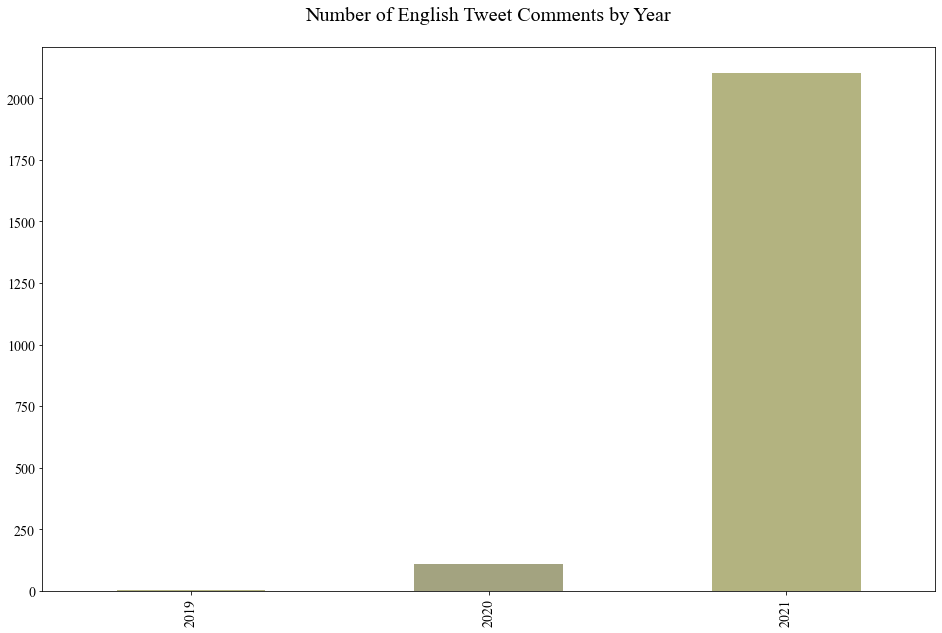

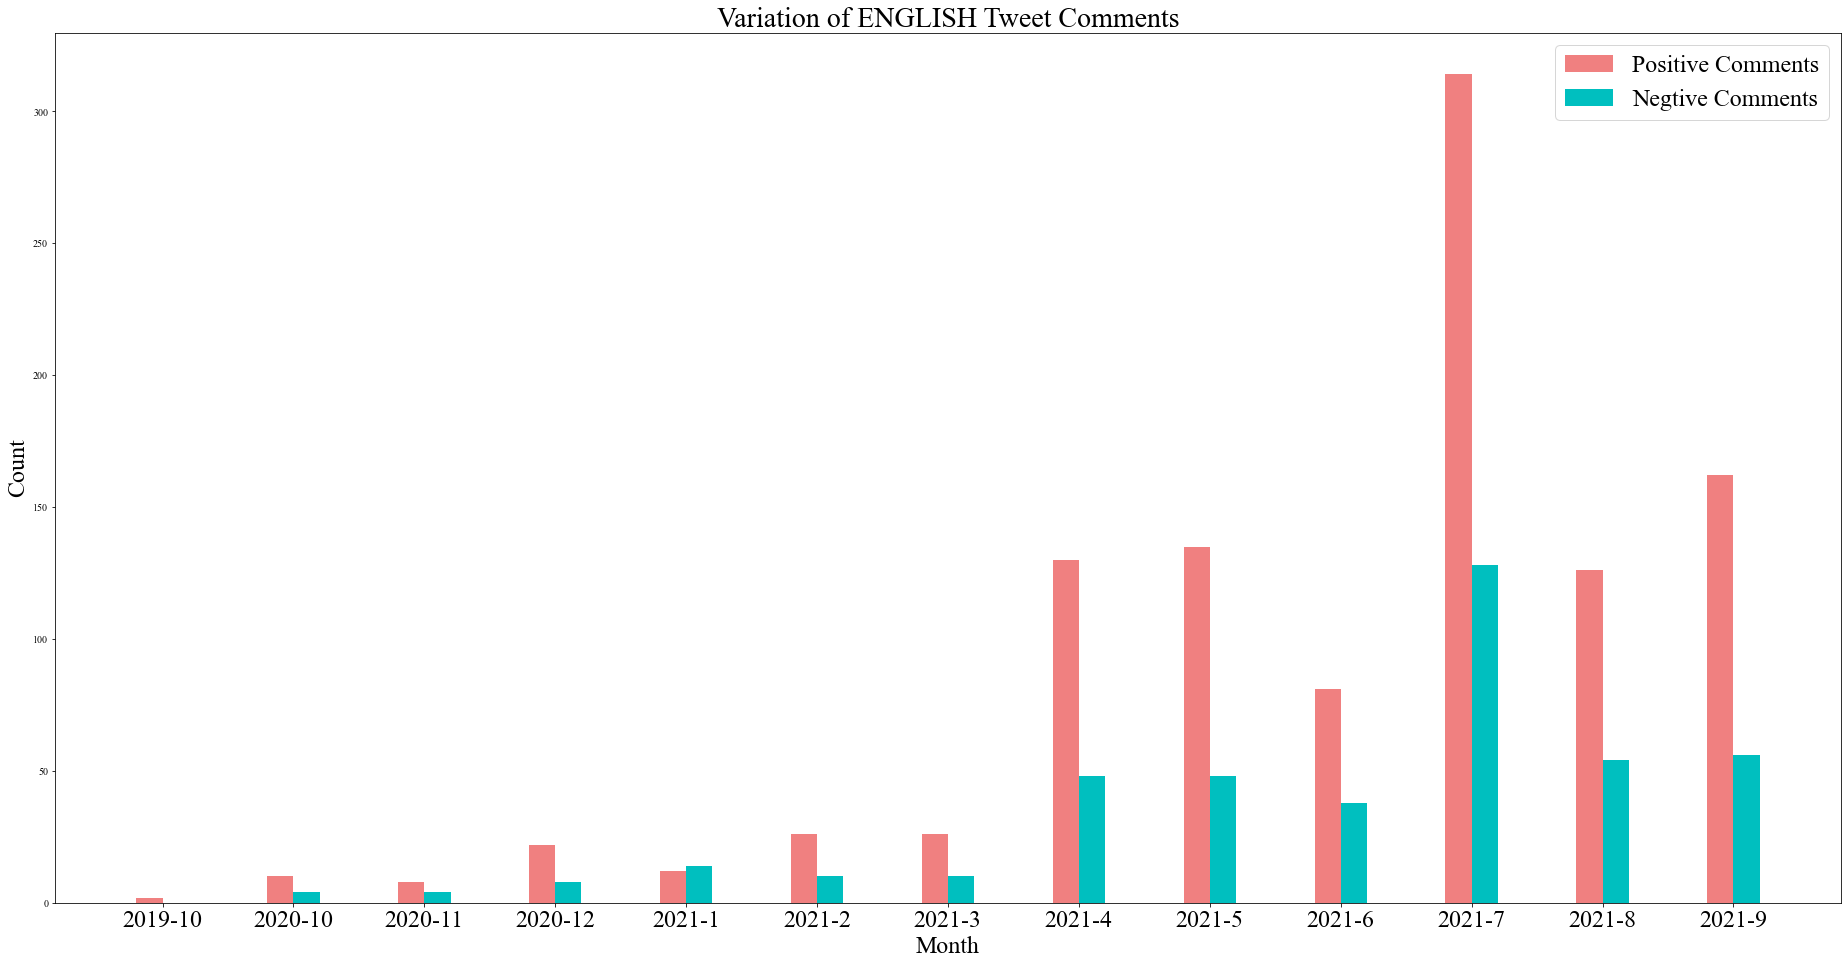

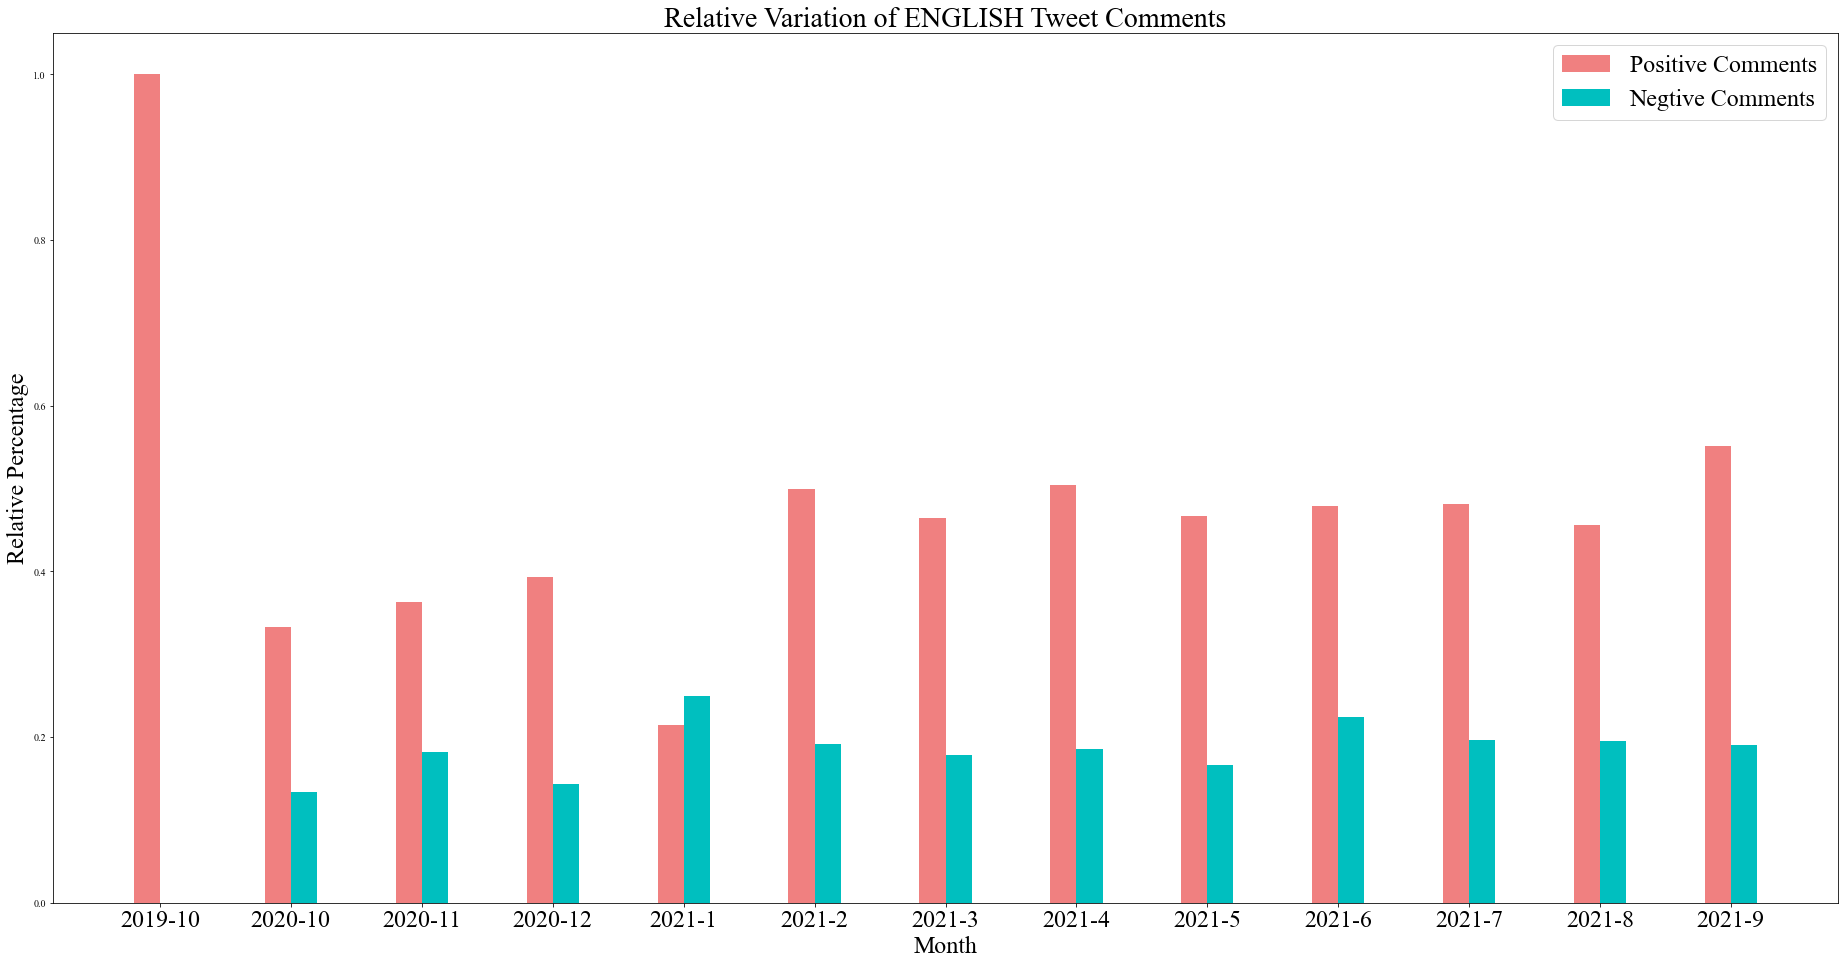

In [645]:
# Number of tweets by year
colors = []
for i in range(2020-2019+1):
    x = 0.7-0.06*i
    c = (x,x,0.5)
    colors.append(c)

bar = cmt_eng["publish_time"].apply(lambda x: x.year).value_counts(dropna=True).sort_index().plot.bar(figsize = (16,10), color = colors)
plt.title("Number of English Tweet Comments by Year\n", fontsize=20)
bar.tick_params(labelsize=14)
plt.show()

# Number of tweets (more details)
cmt_eng["year_month"] = cmt_eng["publish_time"].apply(lambda x: str(x.year)+"-"+str(x.month))


year_month_pos = cmt_eng["year_month"][cmt_eng['comp_score']=="pos"].value_counts(dropna=False).sort_index()
year_month_neg = cmt_eng["year_month"][cmt_eng['comp_score']=="neg"].value_counts(dropna=False).sort_index()
year_month_neg["2019-10"]=0
year_month_neg=year_month_neg.sort_index()

#print(year_month_pos)
#print(year_month_neg)
x1=np.arange(len(year_month_pos)) 
x2=[i+0.2 for i in x1]


fig,ax=plt.subplots(figsize=(32,16))
ax.bar(x1,np.array(year_month_pos.values),width=0.2,color="lightcoral",label="Positive Comments")
ax.bar(x2,np.array(year_month_neg.values),width=0.2,color="c",label="Negtive Comments")

plt.title("Variation of ENGLISH Tweet Comments", fontsize=28)
plt.xticks(x1+0.2/2,labels=year_month_pos.index,fontsize=24)
bar.tick_params(labelsize=16)
plt.legend(loc='upper right',fontsize=24)
plt.xlabel("Month",fontsize=24)
plt.ylabel("Count",fontsize=24)

bar.get_yaxis().set_visible(True)
plt.show()

# Relative number of tweets 
fig,ax=plt.subplots(figsize=(32,16))
ax.bar(x1,np.array(year_month_pos.values)/np.array(cmt_eng["year_month"].value_counts(dropna=True).sort_index()),width=0.2,color="lightcoral",label="Positive Comments")
ax.bar(x2,np.array(year_month_neg.values)/np.array(cmt_eng["year_month"].value_counts(dropna=True).sort_index()),width=0.2,color="c",label="Negtive Comments")

plt.title("Relative Variation of ENGLISH Tweet Comments", fontsize=28)
plt.xticks(x1+0.2/2,labels=year_month_pos.index,fontsize=24)
bar.tick_params(labelsize=16)
plt.legend(loc='upper right',fontsize=24)
plt.xlabel("Month",fontsize=24)
plt.ylabel("Relative Percentage",fontsize=24)

bar.get_yaxis().set_visible(True)
plt.show()

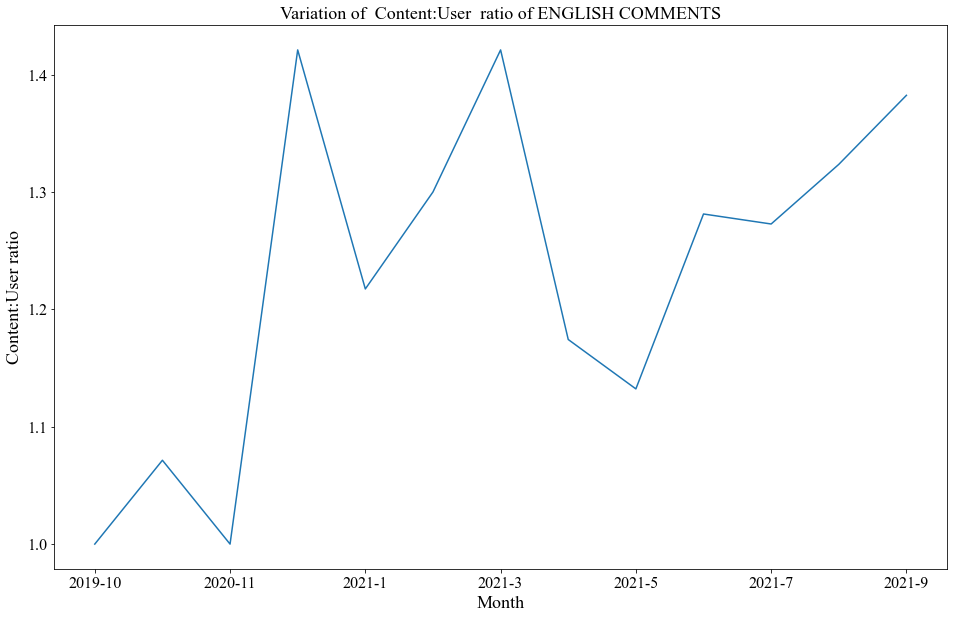

In [646]:
cnt=cmt_eng.groupby(["year_month","topic_guid"])["topic_guid"].count()
usr=cmt_eng.groupby(["year_month","userid"])["userid"].count()
cnt_month=cnt.groupby(["year_month"]).count()
usr_month=usr.groupby(["year_month"]).count()
cnt_to_usr=cnt_month/usr_month
cnt_to_usr

bar = cnt_to_usr.plot(figsize = (16,10))
plt.title("Variation of  Content:User  ratio of ENGLISH COMMENTS", fontsize=18)
bar.tick_params(labelsize=16)

plt.xlabel("Month", fontsize=18)
plt.ylabel("Content:User ratio", fontsize=18)
bar.get_yaxis().set_visible(True)
plt.show()

#### 展示评论帖文的情感打分变化

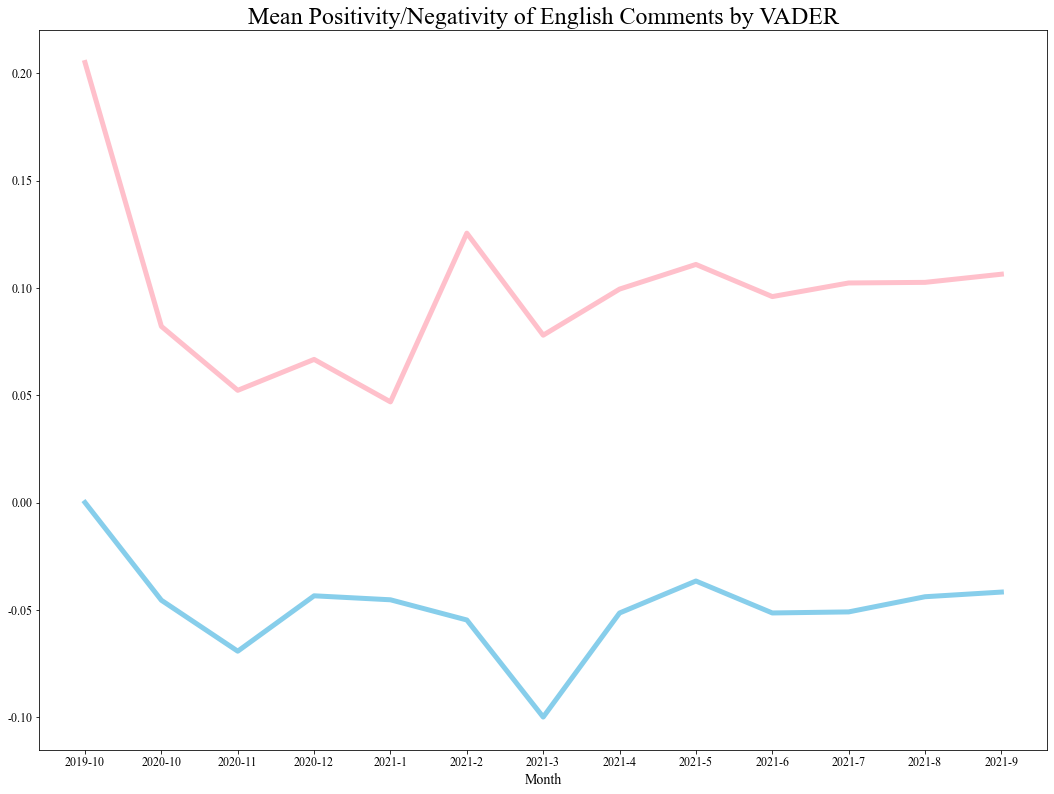

In [647]:
fig = plt.figure(figsize = (14,10))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Mean Positivity/Negativity of English Comments by VADER", fontsize=24)
ax.tick_params(labelsize=14)


# Positivity plot
year_month = pd.pivot_table(cmt_eng, values = "vader_pos", index = "year_month", aggfunc = "mean")
ax.plot(year_month, lw = 5,color = "Pink")

# Negativity plot
year_month = pd.pivot_table(cmt_eng, values = "vader_neg", index = "year_month", aggfunc = "mean").apply(lambda x: -x)
ax.plot(year_month, lw = 5, color = "Skyblue")
plt.xlabel("Month",fontsize=14)

ax.tick_params(labelsize=12)
plt.show()

In [648]:
comment_eng_senti=pd.pivot_table(cmt_eng, values = "vader_comp", index = "year_month", aggfunc = "sum")
english_comment=pd.merge(cmt_eng,comment_eng_senti, on="year_month",suffixes=("_x","_monthsum"))

In [649]:
data_comment_eng=cmt_eng[["cnt_agree", "cnt_comment", "cnt_retweet","comp_score"]]

### Twitter中文评论

In [650]:
comment_chi

userid                                            content  \
16     feixiangdayang    @offweightstudio 有人把火币，比特币，数字人民币都分不清楚、就已经来教育别人了   
17     frozen00788293                  @wangzhian8848 封杀比特币是不是给数字人民币腾地方？   
18       lv_tianxiang  @dougjing @dw_chinese 不算，数字人民币本质上也是人民币，和现金是兑换的...   
19          sylichao1  @HenryLa13947038 数字人民币是现实中的人民币的数字化，和比特币这种基于虚拟计...   
20       lv_tianxiang  @ThECRackERBaRoN 昨天刚听了微博上卡相他们的一个关于虚拟货币的连线直播，还是...   
...               ...                                                ...   
21608      1862172703  紫光同芯数字人民币解决方案，在交易速度方面，深度优化算法，使离线交易性能提速30% RT:@...   
21635      2793767913  #聚焦2021服贸会#【感受酷炫金融科技 体验有温度的服务】数字人民币火出圈、人工智能当客服...   
21636      6329391242  辛苦了，数字人民币不错的，用好几个月了，点赞，点赞。 RT:@吃石头的毛仔 为服贸会服务的人...   
21637      6329391242  数字人民币是通用的，建设银行是说卖方收单是建行钱包，当然为了推广可以理解，但是我是想说，如果...   
21638      3537001381  #交通出行服务# 首发集团与中国工商银行北京分行等6家银行签署战略合作协议，就数字人民币在高...   

      publish_time page_action_type               relevant_topic_guid  \
16      2021-05-20               08  b84923f02c2f33fb951bb8458ad46d29   
17      2021-05-20               08  5326f9031aa71782ec498dd1971b8f0e   
18      2021-05-20               08  1e1d1d5205fa17fd1643b7dfe4351f17   
19      2021-05-20               08  d2dda41565e902537ede76f905eda131   
20      2021-05-20               08  e28c0a4e7df15a9df0d570b8fae54cf2   
...            ...              ...                               ...   
21608   2021-09-04               11  5acf9d1881cbf4ce08f40c42df969859   
21635   2021-09-05               11  fb6a8025e31b80562cc367846494f38d   
21636   2021-09-05               11  07dda8b984a2037ffc0814540c017b6b   
21637   2021-09-05               11  a62d58ee0b2cde0db0193b8604d35f4c   
21638   2021-09-05               11  1aec7633dbad881ffd93f5d0c621abbb   

                             topic_guid cnt_agree cnt_comment cnt_retweet  \
16     b9b32262cdeb1f1b839350c6c797704c         0           0           0   
17     1a7cb65e11b097e0e291ed3443e8f4f8         0           1           0   
18     9098bfbbf645d134f831c967d92ef479        19           0           0   
19     f0c02b07ca4ad9ed86a1c14ae2110603         0           0           0   
20     aea6847ecc10bc2ad467e48f6cd65e64         1           1           0   
...                                 ...       ...         ...         ...   
21608  5acf9d1881cbf4ce08f40c42df969859         0           0           4   
21635  fb6a8025e31b80562cc367846494f38d         0           0           0   
21636  07dda8b984a2037ffc0814540c017b6b         0           5           0   
21637  a62d58ee0b2cde0db0193b8604d35f4c         0           0           0   
21638  1aec7633dbad881ffd93f5d0c621abbb         0           0           0   

      dayofweek language  
16     Thursday       zh  
17     Thursday       zh  
18     Thursday       zh  
19     Thursday       zh  
20     Thursday       zh  
...         ...      ...  
21608  Saturday       zh  
21635    Sunday       zh  
21636    Sunday       zh  
21637    Sunday       zh  
21638    Sunday       zh  

[7090 rows x 11 columns]

In [651]:
import re
import string
import emoji

def clean_text(text):
    '''Make text lowercase, 
    remove text in square brackets,
    remove links,
    remove punctuation.'''
    text = str(text)
    text = re.sub('\(.*?\)', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\【.*?\】', '', text)
    text = re.sub('\《.*?\》', '', text)
    text = re.sub(r"#",'', text)
    text = re.sub(r"•",'', text)
    text = re.sub(r"（",'', text)
    text = re.sub(r"）",'', text)
    text = re.sub(r"『",'', text)
    text = re.sub(r"』",'', text)
    text = re.sub(r"“",'', text)
    text = re.sub(r"”",'', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\'','', text)
    #text = re.sub(r'\W+', '', text)
    #text = re.sub('[^%&,;=?$\x22]', '', text)
    text = re.sub("[a-zA-Z0-9]", "", text)
    text = re.sub(r'\b\w{1,2}\b', "", text) # removes remaining one-letter words and two letters words 
    text = re.sub(r"[ \t]{2,}", "", text)
    return text 


emoji_pattern = re.compile("["
    u'[\uD800-\uDBFF][\uDC00-\uDFFF]'
    u"(\ud83d[\ude00-\ude4f])|"  # emoticons
    u"(\ud83c[\udf00-\uffff])|"  # symbols & pictographs (1 of 2)
    u"(\ud83d[\u0000-\uddff])|"  # symbols & pictographs (2 of 2)
    u"(\ud83d[\ude80-\udeff])|"  # transport & map symbols
    u"(\ud83c[\udde0-\uddff])"  # flags (iOS)
    "]+", flags=re.UNICODE)

def remove_emoji(text):
    return emoji_pattern.sub(r'', text)

def demojized(text):
    text = emoji.demojize(text)
    return text

comment_chi["content"] = comment_chi["content"].apply(lambda x : demojized(x))
comment_chi["content"] = comment_chi["content"].apply(lambda x : remove_emoji(x))
comment_chi["content"] = comment_chi["content"].apply(lambda x : clean_text(x))
comment_chi["content"]

<ipython-input-651-f8198bafd78b>:53: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-651-f8198bafd78b>:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-651-f8198bafd78b>:55: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



16                          有人把火币，比特币，数字人民币都分不清楚、就已经来教育别人了
17                                      封杀比特币是不是给数字人民币腾地方？
18       ，数字人民币本质上也是人民币，和现金是兑换的关系，，只不过载体分别是金属代码而已。人民币的价...
19               数字人民币是现实中的人民币的数字化，和比特币这种基于虚拟计算生产的东西有本质区别的
20        昨天刚听了微博上卡相他们的一个关于虚拟货币的连线直播，还是挺有收获的。数字人民币和比特币完...
                               ...                        
21608    紫光同芯数字人民币解决方案，在交易速度方面，深度优化算法， 手机中国联盟官博 中国国际服务贸...
21635    、人工智能当客服、普惠小微贷款能自助……当科技牵手金融，能够碰撞出怎样的火花？一起感受金融领...
21636    辛苦了，数字人民币不错的，用好几个月了，，。 吃石头的毛仔 为服贸会服务的人伤不起，。不过还...
21637    数字人民币是通用的，建设银行是说卖方收单是建行钱包，当然为了推广可以理解，但是我是想说，如果...
21638    交通出行服务 ，就数字人民币在高速公路等重点业务领域深度合作达成共识。 交通发布 服贸会上看...
Name: content, Length: 7090, dtype: object

In [652]:
comment_chi['len'] = comment_chi['content'].apply(lambda x:len(x))
comment_chi=comment_chi[comment_chi['len']>1]
text=comment_chi.copy()

<ipython-input-652-77af700e3888>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [653]:
from snownlp import SnowNLP
def compute_snownlp_scores(df, label):
    df["snownlp_scores"] = df[label].apply(lambda x: SnowNLP(x).sentiments)
    return df
sentiment = compute_snownlp_scores(text, "content")

In [654]:
def compute_snownlp_senti(df,refer):
    df["snownlp_senti"] = df[refer].apply(lambda x: "pos" if x>0.8 else ('neg' if x<0.5 else 'neu'))
    return df
sentiment = compute_snownlp_senti(sentiment, "snownlp_scores")
cmt_chi=sentiment.copy()
sentiment[:1]

userid                          content publish_time  \
16  feixiangdayang   有人把火币，比特币，数字人民币都分不清楚、就已经来教育别人了   2021-05-20   

   page_action_type               relevant_topic_guid  \
16               08  b84923f02c2f33fb951bb8458ad46d29   

                          topic_guid cnt_agree cnt_comment cnt_retweet  \
16  b9b32262cdeb1f1b839350c6c797704c         0           0           0   

   dayofweek language  len  snownlp_scores snownlp_senti  
16  Thursday       zh   31         0.84005           pos

In [655]:
percent_pos = round(100*sentiment[sentiment['snownlp_senti']=="pos"].shape[0]/sentiment['snownlp_senti'].shape[0], 2)
percent_neu = round(100*sentiment[sentiment['snownlp_senti']=="neu"].shape[0]/sentiment['snownlp_senti'].shape[0], 2)
percent_neg = round(100*sentiment[sentiment['snownlp_senti']=="neg"].shape[0]/sentiment['snownlp_senti'].shape[0], 2)

print(str(percent_pos) + "% 的中文评论被SnowNLP分类为正面情感")
print(str(percent_neg) + "% 的中文评论被SnowNLP分类为负面情感")

45.94% 的中文评论被SnowNLP分类为正面情感
34.19% 的中文评论被SnowNLP分类为负面情感


#### 结合情感分类 统计评论帖文的情感分布

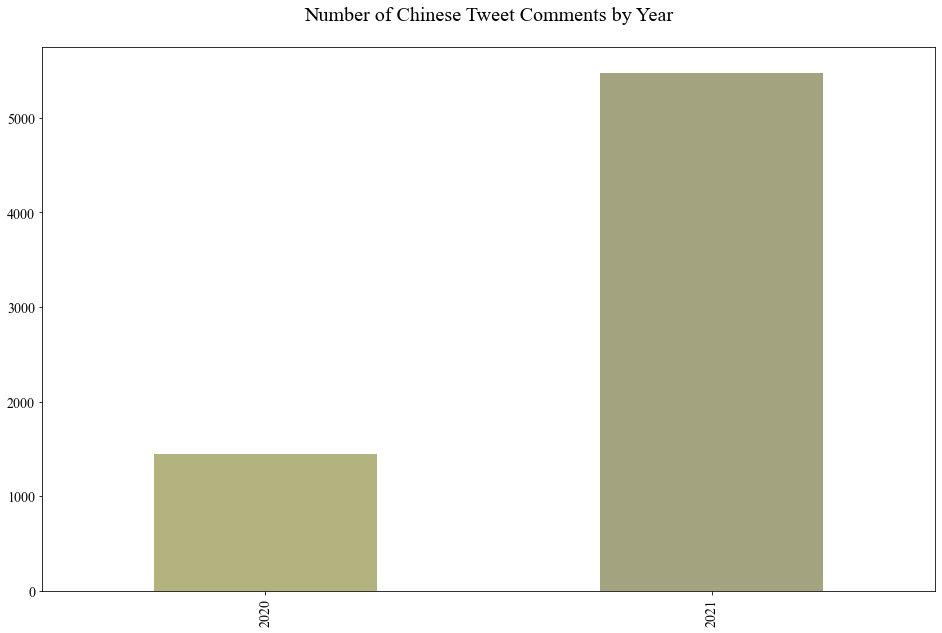

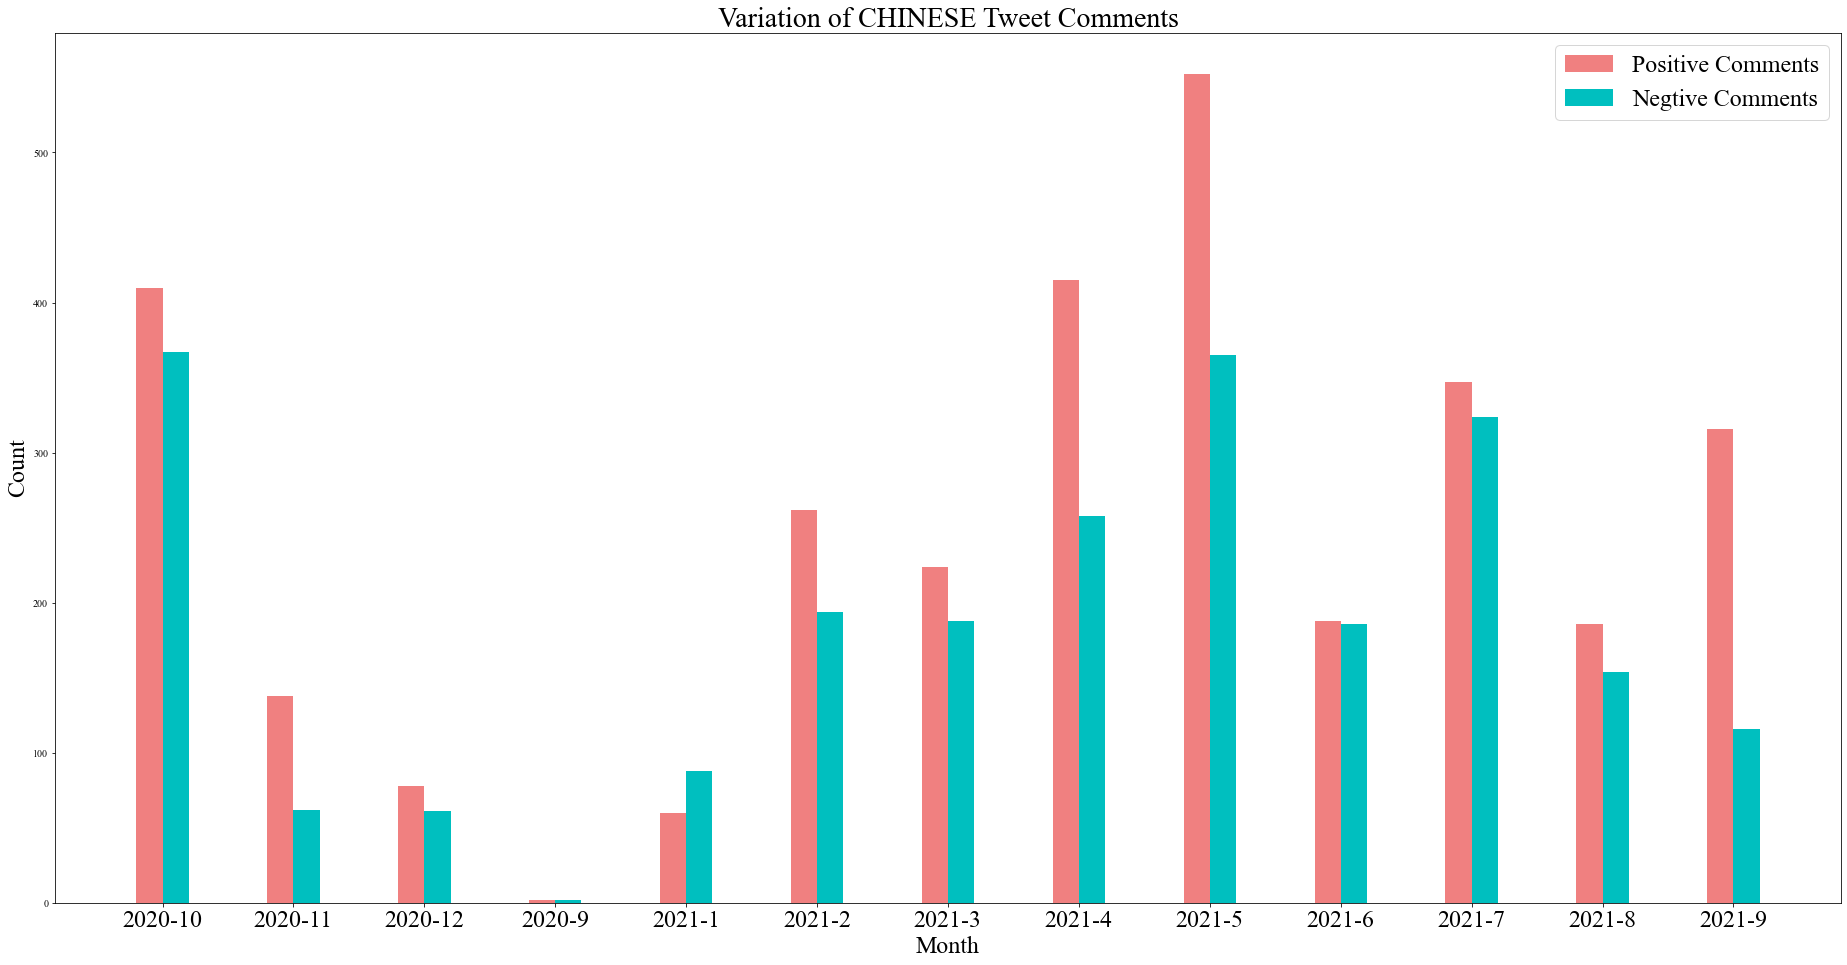

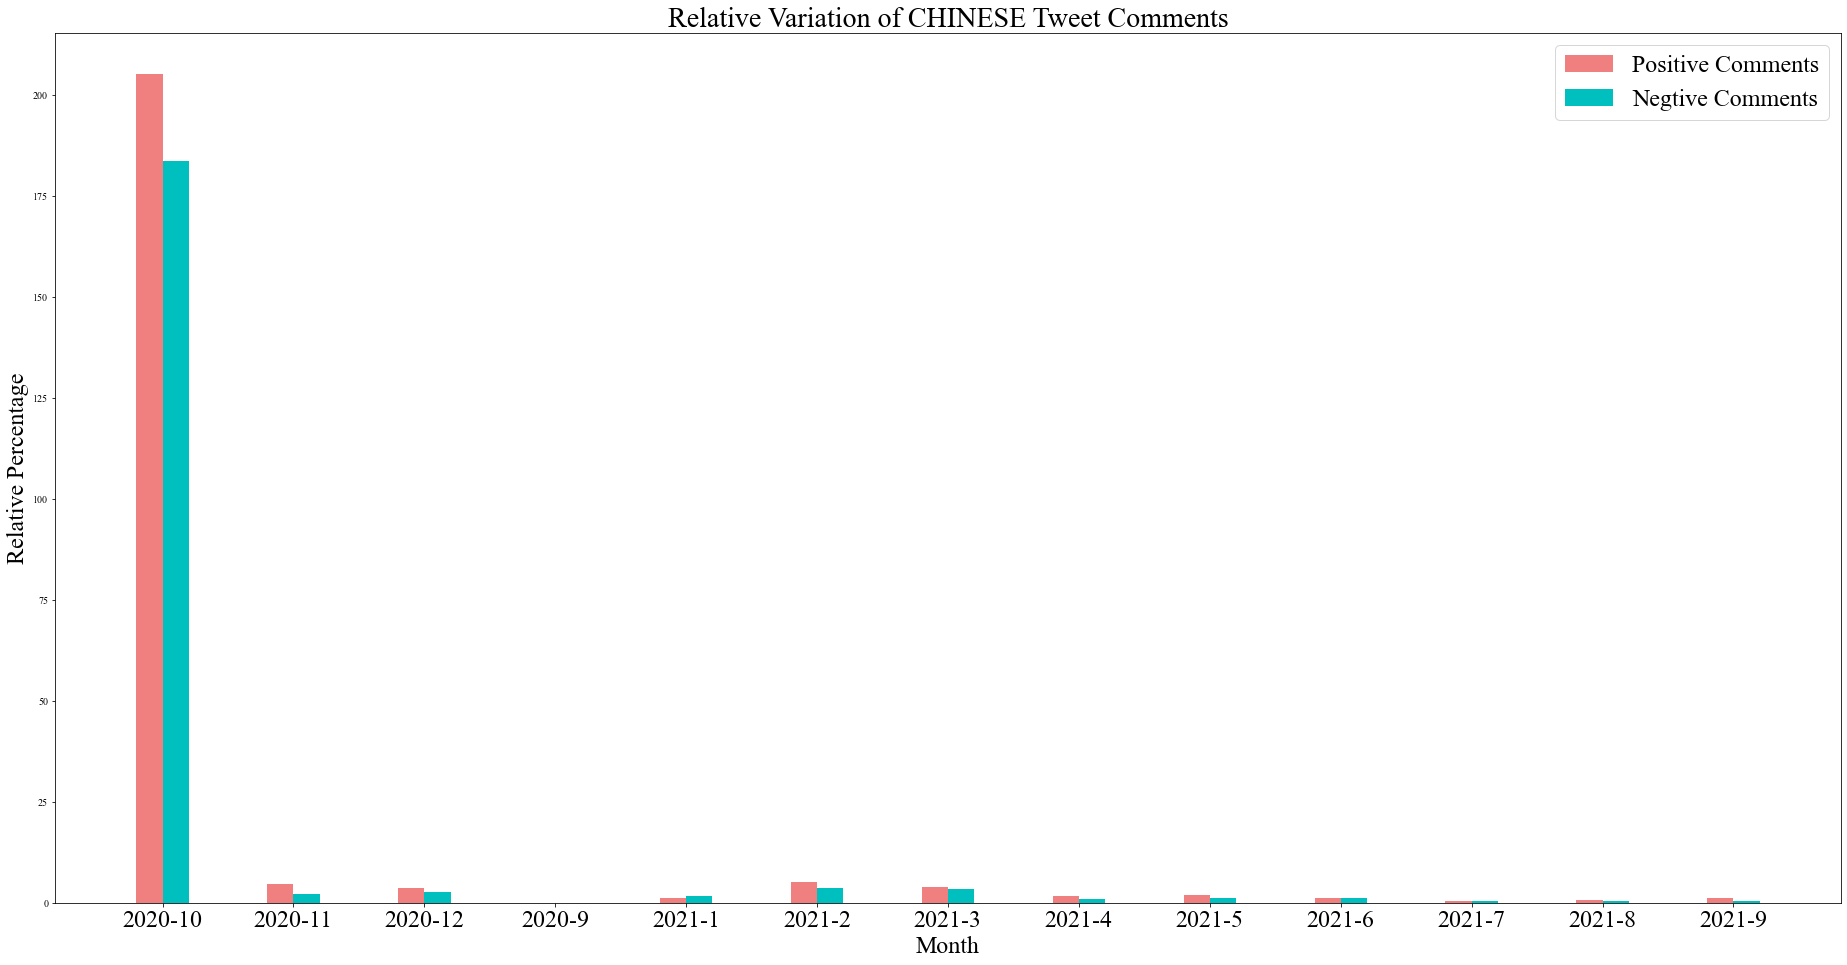

In [656]:
# Number of tweets by year
colors = []
for i in range(2020-2010+1):
    x = 0.7-0.06*i
    c = (x,x,0.5)
    colors.append(c)

bar = cmt_chi["publish_time"].apply(lambda x: x.year).value_counts(dropna=True).sort_index().plot.bar(figsize = (16,10), color = colors)
plt.title("Number of Chinese Tweet Comments by Year\n", fontsize=20)
bar.tick_params(labelsize=14)
plt.show()

# Number of tweets (more details)
cmt_chi["year_month"] = cmt_chi["publish_time"].apply(lambda x: str(x.year)+"-"+str(x.month))


year_month_pos = cmt_chi["year_month"][cmt_chi['snownlp_senti']=="pos"].value_counts(dropna=False).sort_index()
year_month_neg = cmt_chi["year_month"][cmt_chi['snownlp_senti']=="neg"].value_counts(dropna=False).sort_index()

#print(year_month_pos)
#print(year_month_neg)
x1=np.arange(len(year_month_pos)) 
x2=[i+0.2 for i in x1]


fig,ax=plt.subplots(figsize=(32,16))
ax.bar(x1,np.array(year_month_pos.values),width=0.2,color="lightcoral",label="Positive Comments")
ax.bar(x2,np.array(year_month_neg.values),width=0.2,color="c",label="Negtive Comments")

plt.title("Variation of CHINESE Tweet Comments", fontsize=28)
plt.xticks(x1+0.2/2,labels=year_month_pos.index,fontsize=24)
bar.tick_params(labelsize=16)
plt.legend(loc='upper right',fontsize=24)
plt.xlabel("Month",fontsize=24)
plt.ylabel("Count",fontsize=24)

bar.get_yaxis().set_visible(True)
plt.show()

# Relative number of tweets 
fig,ax=plt.subplots(figsize=(32,16))
ax.bar(x1,np.array(year_month_pos.values)/np.array(cmt_eng["year_month"].value_counts(dropna=True).sort_index()),width=0.2,color="lightcoral",label="Positive Comments")
ax.bar(x2,np.array(year_month_neg.values)/np.array(cmt_eng["year_month"].value_counts(dropna=True).sort_index()),width=0.2,color="c",label="Negtive Comments")

plt.title("Relative Variation of CHINESE Tweet Comments", fontsize=28)
plt.xticks(x1+0.2/2,labels=year_month_pos.index,fontsize=24)
bar.tick_params(labelsize=16)
plt.legend(loc='upper right',fontsize=24)
plt.xlabel("Month",fontsize=24)
plt.ylabel("Relative Percentage",fontsize=24)

bar.get_yaxis().set_visible(True)
plt.show()

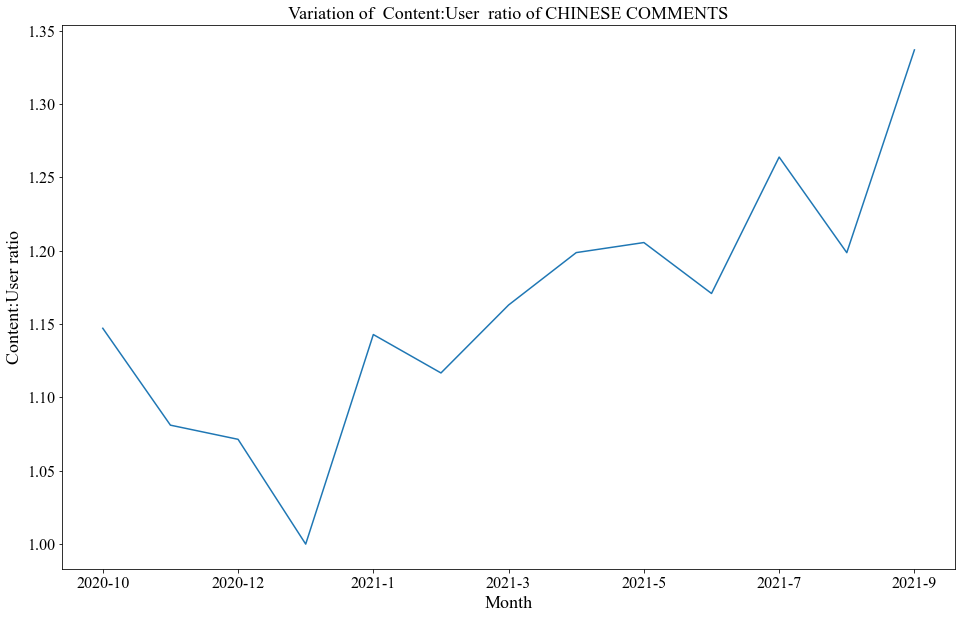

In [657]:
cnt=cmt_chi.groupby(["year_month","topic_guid"])["topic_guid"].count()
usr=cmt_chi.groupby(["year_month","userid"])["userid"].count()
cnt_month=cnt.groupby(["year_month"]).count()
usr_month=usr.groupby(["year_month"]).count()
cnt_to_usr=cnt_month/usr_month
cnt_to_usr

bar = cnt_to_usr.plot(figsize = (16,10))
plt.title("Variation of  Content:User  ratio of CHINESE COMMENTS", fontsize=18)
bar.tick_params(labelsize=16)

plt.xlabel("Month", fontsize=18)
plt.ylabel("Content:User ratio", fontsize=18)
bar.get_yaxis().set_visible(True)
plt.show()

#### 展示评论帖文的情感打分变化

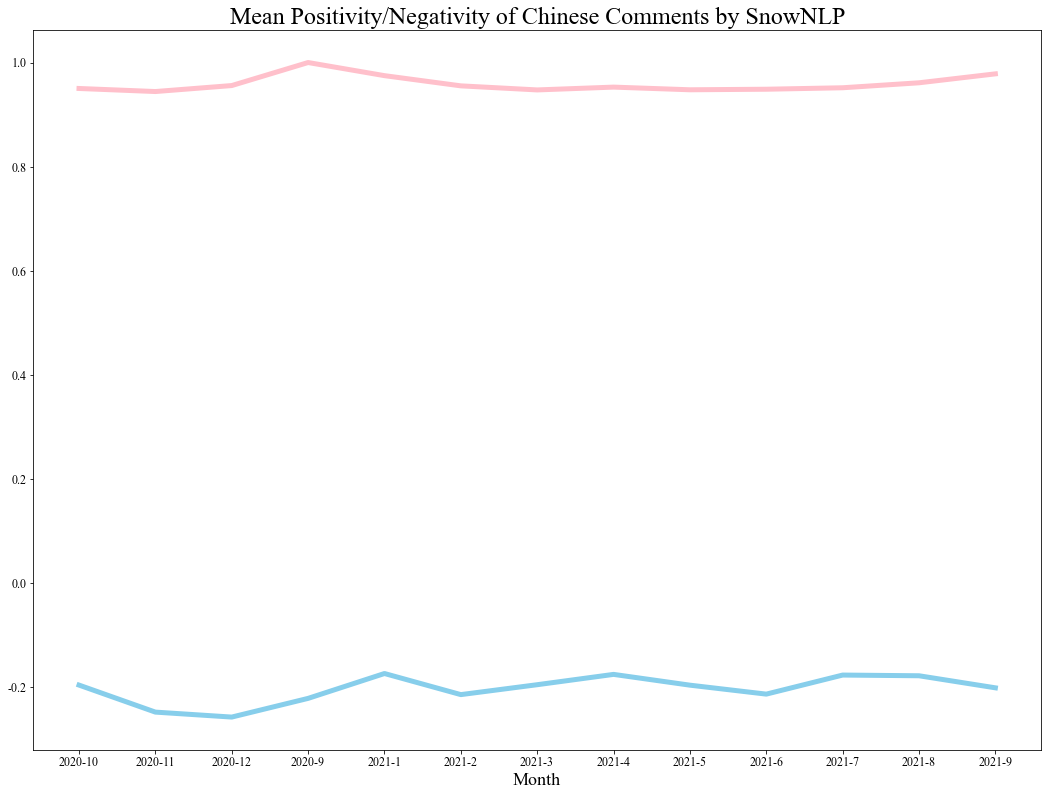

In [658]:
fig = plt.figure(figsize = (14,10))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Mean Positivity/Negativity of Chinese Comments by SnowNLP", fontsize=24)
ax.tick_params(labelsize=14)

pos_chi=cmt_chi[cmt_chi["snownlp_senti"]=="pos"]
neg_chi=cmt_chi[cmt_chi["snownlp_senti"]=="neg"]
# Positivity plot
year_month = pd.pivot_table(pos_chi, values = "snownlp_scores", index = "year_month", aggfunc = "mean")
ax.plot(year_month, lw = 5,color = "Pink")

# Negativity plot
year_month = pd.pivot_table(neg_chi, values = "snownlp_scores", index = "year_month", aggfunc = "mean").apply(lambda x: -x)
ax.plot(year_month, lw = 5, color = "Skyblue")
plt.xlabel("Month",fontsize=18)



ax.tick_params(labelsize=12)
plt.show()

In [659]:
cmt_chi["snownlp_scores"]=cmt_chi["snownlp_scores"].apply(lambda x: (x-0.5)*2 )

In [660]:
comment_chi_senti=pd.pivot_table(cmt_chi, values = "snownlp_scores", index = "year_month", aggfunc = "sum")
chinese_comment=pd.merge(cmt_chi,comment_chi_senti, on="year_month",suffixes=("_x","_monthsum"))
pd.concat([comment_chi_senti,comment_eng_senti],axis=1).sort_index().fillna(0).to_csv('/Users/patricia/Downloads/senti_comment.csv')

In [661]:
pd.concat([comment_chi_senti,comment_eng_senti],axis=1).sort_index().fillna(0)

snownlp_scores  vader_comp
2019-10        0.000000      1.1988
2020-10      212.643041      4.2264
2020-11      105.434233      2.3396
2020-12       53.765539      8.5906
2020-9         1.779057      0.0000
2021-1        11.784332      1.4366
2021-2       166.068347      9.8250
2021-3       121.334269      4.9428
2021-4       245.618568     40.8976
2021-5       347.508881     49.7646
2021-6        90.084507     21.0605
2021-7       140.284432     92.5510
2021-8       100.769323     44.4012
2021-9       252.392583     53.0546

In [662]:
data_comment_chi=cmt_chi[["cnt_agree", "cnt_comment", "cnt_retweet","snownlp_senti"]]

基于单独帖文内容进行统计关联

In [663]:
original=twitter[twitter["page_action_type"]=="07"]
comment=twitter[twitter["page_action_type"]=="08"]
join=pd.merge(original,comment, on="relevant_topic_guid",how="inner")
join["year_month"] = join["publish_time_x"].apply(lambda x: str(x.year)+"-"+str(x.month))
# content_x 原帖内容 content_y 评论内容

In [664]:
t1=original["content"].value_counts().sort_values(ascending=False)
#t1=t1[t1>4]
t1.describe()

count    5610.000000
mean        2.081818
std         0.872455
min         2.000000
25%         2.000000
50%         2.000000
75%         2.000000
max        32.000000
Name: content, dtype: float64

In [665]:
t2=comment["content"].value_counts().sort_values(ascending=False)
t2.describe()

count    4623.000000
mean        2.089552
std         0.417314
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         8.000000
Name: content, dtype: float64

In [666]:
t2=t2[t2==8]
t2

@WolfieZhao The paper openly states they will censor people with smart contracts    8
Name: content, dtype: int64

In [667]:
#temp=join.groupby(["year_month","userid_x","userid_y"])
#pd.pivot_table(join,values=["userid_x","userid_y"],index="year_month", aggfunc = "count")
sort=join.groupby(["userid_x","userid_y"])["publish_time_x"].value_counts().sort_values(ascending=False)
sort

userid_x      userid_y         publish_time_x
WuBlockchain  JAVIDKARIMKHANI  2021-07-17        28
OkTelegraph   OkTelegraph      2021-09-09        24
WallStTV      USAUSA95348691   2021-04-12        20
BCoeure       VeriDelisi       2020-12-13        16
jamieCrypto   cryptoken_board  2021-05-05        16
                                                 ..
Jakewang4281  Mrlee83907332    2021-03-26         2
myfxtrader    SXAK8888         2021-06-30         2
              QianJie8         2021-06-30         2
              BEKffSomSJGX     2021-06-30         2
RFA_Chinese   Yasuraoka_2021   2021-02-26         2
Name: publish_time_x, Length: 2588, dtype: int64

In [668]:
sort_cmt=join.groupby(["year_month","userid_x","userid_y"])["content_y"].value_counts().sort_values(ascending=False)
sort_cmt[:5]

year_month  userid_x        userid_y         content_y                                                                                                                                                                                                                                                                            
2021-3      nytchinese      Wilson39875605   @nytchinese Shameless New York Times, the Fake/Misleading media. God will punish you liars from New York Times!!! New York Times LIES Exposed-1: https://t.co/1qneHpRGVc New York Times LIES Exposed-2: https://t.co/k4Noty2uYHNew York Times LIES Exposed-3: https://t.co/pxSnZ2myQO    12
2021-8      rijingzhongwen  Real_Samurai_JP  @rijingzhongwen 日本的小中餐館幾乎百分百不支持手機支付或者信用卡支付，理由就是為了方便逃稅。客人不索要，連小票都不給，錢根本不走收銀機，所以我每次必索要小票或者發票，出門就扔掉。                                                                                                                                                                                         8
                   

In [669]:
content=pd.merge(sort,join[['userid_x', 'content_x', 'publish_time_x','relevant_topic_guid','cnt_agree_x',
                                         'cnt_comment_x','cnt_retweet_x', 'userid_y', 'content_y','publish_time_y',
                                         'cnt_agree_y','cnt_comment_y', 'cnt_retweet_y',"year_month"]], 
                                        on=["userid_x","userid_y"],suffixes=("_totalcount","_top"),how="left")

content

userid_x         userid_y  publish_time_x_totalcount  \
0      WuBlockchain  JAVIDKARIMKHANI                         28   
1      WuBlockchain  JAVIDKARIMKHANI                         28   
2      WuBlockchain  JAVIDKARIMKHANI                         28   
3      WuBlockchain  JAVIDKARIMKHANI                         28   
4      WuBlockchain  JAVIDKARIMKHANI                         28   
...             ...              ...                        ...   
14707    myfxtrader         QianJie8                          2   
14708    myfxtrader     BEKffSomSJGX                          2   
14709    myfxtrader     BEKffSomSJGX                          2   
14710   RFA_Chinese   Yasuraoka_2021                          2   
14711   RFA_Chinese   Yasuraoka_2021                          2   

                                               content_x publish_time_x_top  \
0      China crypto news of the week (July 11 to July...         2021-07-20   
1      China crypto news of the week (July 11 to July...         2021-07-20   
2      China crypto news of the week (July 11 to July...         2021-07-20   
3      China crypto news of the week (July 11 to July...         2021-07-20   
4      China crypto news of the week (July 11 to July...         2021-07-20   
...                                                  ...                ...   
14707  数字人民币今天起可以刷北京地铁了。但是，有点复杂。首先需要工行的账户，然后开通工行数字人民币...         2021-06-30   
14708  数字人民币今天起可以刷北京地铁了。但是，有点复杂。首先需要工行的账户，然后开通工行数字人民币...         2021-06-30   
14709  数字人民币今天起可以刷北京地铁了。但是，有点复杂。首先需要工行的账户，然后开通工行数字人民币...         2021-06-30   
14710  继深圳、苏州和北京后，成都本周三（24日）启动 #数字人民币，成为中国第四个数字人民币的试点...         2021-02-26   
14711  继深圳、苏州和北京后，成都本周三（24日）启动 #数字人民币，成为中国第四个数字人民币的试点...         2021-02-26   

                    relevant_topic_guid cnt_agree_x cnt_comment_x  \
0      aad20a4c3fbf038150fe657996fae390          43            12   
1      aad20a4c3fbf038150fe657996fae390          43            12   
2      aad20a4c3fbf038150fe657996fae390          43            12   
3      aad20a4c3fbf038150fe657996fae390          43            12   
4      aad20a4c3fbf038150fe657996fae390          43            12   
...                                 ...         ...           ...   
14707  c3a6322b683e20fa267f026a9e284c50           9             4   
14708  c3a6322b683e20fa267f026a9e284c50           9             4   
14709  c3a6322b683e20fa267f026a9e284c50           9             4   
14710  f9dbd101cd0992b7fe19ade55e934959          28            22   
14711  f9dbd101cd0992b7fe19ade55e934959          28            22   

      cnt_retweet_x                                      content_y  \
0                 6          @WuBlockchain https://t.co/Xnl4C5erlR   
1                 6          @WuBlockchain https://t.co/ngZs9fMqdV   
2                 6          @WuBlockchain https://t.co/Xnl4C5erlR   
3                 6          @WuBlockchain https://t.co/ngZs9fMqdV   
4                 6          @WuBlockchain https://t.co/Xnl4C5erlR   
...             ...                                            ...   
14707             5  @myfxtrader 下载app1--》下载app2--〉下载app3，加入专区，使用！   
14708             5  @myfxtrader 下载app1--》下载app2--〉下载app3，加入专区，使用！   
14709             5  @myfxtrader 下载app1--》下载app2--〉下载app3，加入专区，使用！   
14710            13                          @RFA_Chinese 赛博朋克看中国！   
14711            13                          @RFA_Chinese 赛博朋克看中国！   

      publish_time_y cnt_agree_y cnt_comment_y cnt_retweet_y year_month  
0         2021-07-20           1             0             0     2021-7  
1         2021-07-20           1             0             0     2021-7  
2         2021-07-20           1             0             0     2021-7  
3         2021-07-20           1             0             0     2021-7  
4         2021-07-20           1             0             0     2021-7  
...              ...         ...           ...           ...        ...  
14707     2021-06-30           1             0             0     2021

In [670]:
linkup=pd.DataFrame(content[["content_x",'content_y']].value_counts().sort_values(ascending=False),columns=["Count"])
#linkup=linkup[linkup>200].dropna()
linkup.describe()

Count
count  2670.000000
mean      5.510112
std       6.625428
min       2.000000
25%       4.000000
50%       4.000000
75%       4.000000
max     120.000000

In [671]:
linkup=linkup[linkup>4].dropna()
linkup

Count
content_x                                          content_y                                                
【天喻信息计划在数据安全及数字人民币系列产品产业化项目投资6.1亿元】9月8日晚，天喻信息发布... 根据公告，数据安全及数字人民币系列产品产业化项目计划投资6.1亿元，项目建成投产后，将进一步提...  120.0
【范一飞谈数字货币：既不完全按照账户去管理也不能照搬纸币去要求】9月10日消息，中国人民银行副... 积极对外赋能，共同打造数字人民币生态体系。在规则制定方面，以中心化管理、统一认知、实现防伪为前...   60.0
【上海：“十四五”期间稳步推进数字人民币应用试点，丰富相关应用场景】8月24日消息，上海市人民... 推动在浦东设立国家级金融科技研究机构。提升金融科技应用水平，稳步推进数字人民币应用试点，丰富数...   60.0
【北京海淀：推进法定数字货币试验区建设，数字人民币受理超5000家商户】8月25日消息，海淀区... 海淀区积极推进法定数字货币试验区建设，超5000家商户可以受理数字人民币，在数字经济领域，搭建...   60.0
【数字人民币App中能为数字人民币钱包充值的银行达35家】8月20日消息，目前，在数字人民币A... 除了国有六大行，还包括中信、光大、招行、浦发、民生、平安、广发和浙商等股份制银行，以及北京、上...   60.0
...                                                                                                      ...
Touring a night street in Changsha Central Chin... @LiuXininBeijing De belles images                     6.0
                                                   @LiuXininBeijing China should make more movies ...    6.0
【周小川澄清数字人民币误解：不是想取代第三方支付 也不是要取代美元主导地位】这是一种双层系统，... @caijingxiang 不要相信中共                                  6.0
华为交配 40 「是全球首款搭载数字人民币钱包的手机」，要用华为钱包并绑定手机号           @2Lmwx 數字糧票搭配良民證                                      6.0
Touring a night street in Changsha Central Chin... @LiuXininBeijing How’s it said the New Orleans ...    6.0

[474 rows x 1 columns]

In [672]:
a1=np.array(data_original_eng)
a2=np.array(data_original_chi)
a3=np.array(data_comment_eng)
a4=np.array(data_comment_chi)
data=np.vstack((a1,a2,a3,a4))

In [673]:
data=pd.DataFrame(data,columns=["agree","comment","retweet","sentiment"])
data

agree comment retweet sentiment
0         0       0       0       neg
1         1       0       1       neu
2         0       0       0       neg
3         0       0       0       neg
4         0       0       0       neg
...     ...     ...     ...       ...
19738     0       0       4       pos
19739     0       0       0       pos
19740     0       5       0       pos
19741     0       0       0       pos
19742     0       0       0       pos

[19743 rows x 4 columns]

In [674]:
X=data[["agree","comment","retweet"]]
Y=data["sentiment"]

In [675]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [676]:
kmeans.cluster_centers_

array([[1.35326677e+00, 2.96311624e-01, 3.17417619e-01],
       [6.08000000e+02, 6.10000000e+01, 1.86636364e+02],
       [1.47450000e+03, 1.15000000e+02, 1.88500000e+02],
       [1.84682927e+02, 4.28048780e+01, 5.01219512e+01],
       [5.50723684e+01, 9.56578947e+00, 1.48750000e+01]])

### 手肘法检验
SSE利用计算误方差和，来实现对不同K值的选取后，每个K值对应簇内的点到中心点的距离误差平方和，理论上SSE的值越小，代表聚类效果越好，通过数据测试，SSE的值会逐渐趋向一个最小值。



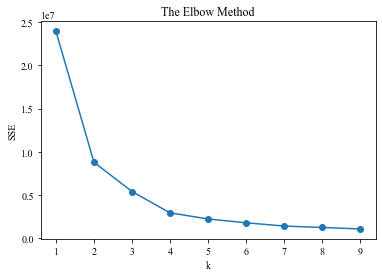

In [677]:
#dt = pd.DataFrame.from_records(data, columns=["agree","comment","retweet"])


# '利用SSE选择k'
SSE = []  # 存放每次结果的误差平方和
for k in range(1, 10):
    estimator = KMeans(n_clusters=k,init='k-means++',random_state=0)  # 构造聚类器
    estimator.fit(X)
    SSE.append(estimator.inertia_)
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(range(1, 10), SSE, 'o-')
plt.show()


The last elbow comes at k=3 / k=4
### 轮廓系数
簇内不相似性、最近的簇间不相似性、以及这两个值最大值的比值,代表簇间分离程度的度量


[3]
[0.12596243024380818, 0.1067512974266761, 0.10096727546372454, 0.09346917671567884, 0.09143388609526695, 0.09202359892296895, 0.08790463830862191, 0.08784257831594877, 0.08611269425488181, 0.08621096680227397, 0.09096218173558833, 0.0907861221563558, 0.08759648844539226, 0.0928719521050715, 0.09071084109329342, 0.09638802668729211, 0.09421452808569238]


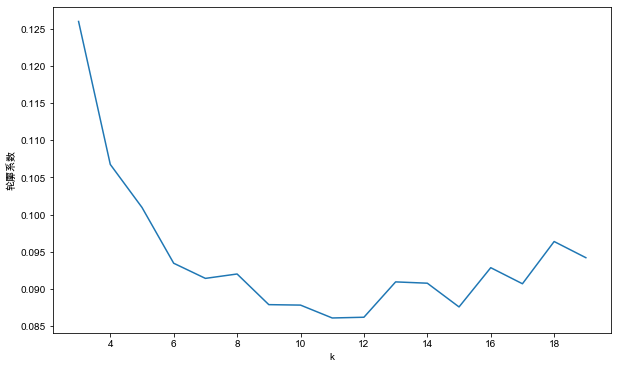

In [678]:
from sklearn.metrics import silhouette_score
from Bio.Cluster import kcluster
from Bio.Cluster import clustercentroids
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial Unicode MS'

%matplotlib inline
import numpy as np

coef = []
x=range(3,20)
for clusters in x:
    clusterid, error, nfound = kcluster(X.values, clusters, dist='u',npass=100)
    silhouette_avg = silhouette_score(X.values, clusterid, metric = 'cosine')
    coef.append(silhouette_avg)
  
e =[i+3 for i,j in enumerate(coef) if j == max(coef)]
print (e)
print (coef)
#plt.plot(x,coef)
#plt.show()

plt.figure(figsize=(10,6))
plt.plot(x,coef,linewidth=1.5,linestyle='-')
plt.xlabel('k')
plt.ylabel('轮廓系数')
plt.show()


轮廓系数观察曲线的畸变程度，即斜率变化。斜率变化快的部分即为分类的最优选择。从图中可以看到在4~5两段的变化最快

In [679]:
from sklearn.cluster import KMeans # KMeans clustering 
import plotly.graph_objs as go
import plotly.offline as py


from Bio.Cluster import * 
#http://biopython.org/DIST/docs/api
 
#用k-means 或 k-median进行聚类，K为聚类数
#   clusterid: npass次聚类中最好的一次解决方案
#   cdata: 聚类中心的坐标
def KCluster(data, K):
    clusterid, error, nfound = kcluster (data, nclusters=K, dist='u',mask=None, weight=None, transpose=0, npass=1, method='a', initialid=None)
    cdata, cmask = clustercentroids(data, mask=None, transpose=0, clusterid=clusterid, method='a')
    print(cdata)
    return clusterid, cdata
 


#clusterid, error, nfound = kcluster(X.values, nclusters=5, dist='u',npass=100)

#kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
clusterid, cdata= KCluster(X.values, 4)
#y_kmeans= kmeansmodel.fit_predict(X)
trace_Kmeans = go.Scatter(x=X.values[:, 0], y= X.values[:, 1], mode="markers",
                    showlegend=False,
                    marker=dict(
                            size=8,
                            color = clusterid,
                            colorscale = 'Portland',
                            showscale=False, 
                            line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
                   ))

layout = go.Layout(
    title= 'KMeans Clustering',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)

data1 = [trace_Kmeans]
fig1 = dict(data=data1, layout= layout)
# fig1.append_trace(contour_list)
py.iplot(fig1, filename="KMeans(Agree vs. Comment)")



trace_Kmeans2 = go.Scatter(x=X.values[:, 1], y= X.values[:, 2], mode="markers",
                    showlegend=False,
                    marker=dict(
                            size=8,
                            color = clusterid,
                            colorscale = 'Portland',
                            showscale=False, 
                            line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
                   ))

layout = go.Layout(
    title= 'KMeans Clustering',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)

data2 = [trace_Kmeans2]
fig2 = dict(data=data2, layout= layout)
# fig1.append_trace(contour_list)
py.iplot(fig2, filename="KMeans(Comment vs. Retweet)")

trace_Kmeans3 = go.Scatter(x=X.values[:, 0], y= X.values[:, 2], mode="markers",
                    showlegend=False,
                    marker=dict(
                            size=8,
                            color = clusterid,
                            colorscale = 'Portland',
                            showscale=False, 
                            line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
                   ))

layout = go.Layout(
    title= 'KMeans Clustering',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)

data3 = [trace_Kmeans3]
fig3 = dict(data=data3, layout= layout)
# fig1.append_trace(contour_list)
py.iplot(fig3, filename="KMeans(Agree vs. Retweet)")

[[4.27377137 0.31303419 0.15865385]
 [7.79944904 1.01157025 2.1476584 ]
 [1.32885324 1.50487752 0.60914806]
 [2.7108674  0.24675972 1.95264207]]


In [680]:
pd.DataFrame(cdata,columns=["agree","comment","retweet"])

agree   comment   retweet
0  4.273771  0.313034  0.158654
1  7.799449  1.011570  2.147658
2  1.328853  1.504878  0.609148
3  2.710867  0.246760  1.952642

In [681]:
pd.DataFrame(cdata,columns=["agree","comment","retweet"]).to_csv('/Users/patricia/Downloads/clustercenter.csv')
X.to_csv('/Users/patricia/Downloads/chinese_original.csv')

In [682]:
cnt_acr=pd.DataFrame(np.vstack((np.array(original_chi),np.array(original_eng))),columns=["content","agree","comment","retweet","sentiment"])
cnt_acr

content agree comment  \
0      偶然去银行办业务，被强推了数字钱包，称每个卡都要升级数字钱包，否则以后不能用，以后发工资也要...    14       0   
1      比特币基金会主席 布罗克·皮尔斯：我认为中共国对数字货币的打压以推行数字人民币的这一举措让美...     5       0   
2      央行前行长周小川：支付系统现代化是隔一段时间迈一个台阶要有比较大的台阶，大家才有足够的动力去...     1       2   
3                                  凯尔巴斯：。它就是一个现代数字特洛伊木马。     0       0   
4      周小川：不要过多将数字人民币与国际化联系周小川数字人民币国际化人民币数字货币储备货币主导地位...     0       0   
...                                                  ...   ...     ...   
10608  digital yuan launch draws near employees paid ...     0       0   
10609  digital yuan launch draws near employees paid ...     0       0   
10610  digital yuan launch draws near employees paid ...     0       0   
10611  employees paid ecny tencent ant mastercard eng...     0       0   
10612  digital yuan launch steps employees paid with ...     0       0   

      retweet sentiment  
0           0       neg  
1           9       pos  
2           0       neg  
3           0       pos  
4           0       pos  
...       ...       ...  
10608       0       pos  
10609       0       pos  
10610       0       pos  
10611       0       pos  
10612       0       neu  

[10613 rows x 5 columns]

In [683]:
cdata=pd.DataFrame(cdata,columns=["agree","comment","retweet"])
cdata

agree   comment   retweet
0  4.273771  0.313034  0.158654
1  7.799449  1.011570  2.147658
2  1.328853  1.504878  0.609148
3  2.710867  0.246760  1.952642

    fit_predict() 无监督学习
    fit_tranform() 有监督学习